In [ ]:
# !pip install kaggle


In [ ]:
# import os

# # Specify the path where 'kaggle.json' is uploaded
# kaggle_json_path = '/work/kaggle.json'  # Update this path if you uploaded the file to a different location

# # Set the Kaggle API credentials
# os.environ['KAGGLE_CONFIG_DIR'] = os.path.dirname(kaggle_json_path)


In [ ]:
#  ! kaggle competitions download -c acea-water-prediction

# Data Collection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

df = pd.read_csv('/work/-20230801-192203/Aquifer_Petrignano.csv')

In [ ]:
df.head()

Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0  14/03/2006                    NaN                    -22.48   
1  15/03/2006                    NaN                    -22.38   
2  16/03/2006                    NaN                    -22.25   
3  17/03/2006                    NaN                    -22.38   
4  18/03/2006                    NaN                    -22.60   

   Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  Temperature_Petrignano  \
0                    -22.18                       NaN                     NaN   
1                    -22.14                       NaN                     NaN   
2                    -22.04                       NaN                     NaN   
3                    -22.04                       NaN                     NaN   
4                    -22.04                       NaN                     NaN   

   Volume_C10_Petrignano  Hydrometry_Fiume_Chiascio_Petrignano  
0                    NaN                                   NaN  
1                    NaN                                   NaN  
2                    NaN                                   NaN  
3                    NaN                                   NaN  
4                    NaN                                   NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [ ]:
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)

In [ ]:
df.head()

Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0  01/01/2009                    0.0                    -31.96   
1  02/01/2009                    0.0                    -32.03   
2  03/01/2009                    0.0                    -31.97   
3  04/01/2009                    0.0                    -31.91   
4  05/01/2009                    0.0                    -31.94   

   Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  Temperature_Petrignano  \
0                    -31.14                       5.2                     4.9   
1                    -31.11                       2.3                     2.5   
2                    -31.07                       4.4                     3.9   
3                    -31.05                       0.8                     0.8   
4                    -31.01                      -1.9                    -2.1   

   Volume_C10_Petrignano  Hydrometry_Fiume_Chiascio_Petrignano  
0             -24530.688                                   2.4  
1             -28785.888                                   2.5  
2             -25766.208                                   2.4  
3             -27919.296                                   2.4  
4             -29854.656                                   2.3

In [ ]:
df.columns

Index(['Date', 'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

In [ ]:
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)
df.columns

Index(['Date', 'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P25',
       'Temperature_Bastia_Umbra', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

In [ ]:
# Simplify column names
df.columns = ['Date', 'Rainfall', 'Depth_to_Groundwater_P25', 'Temperature', 'Drainage_Volume', 'River_Hydrometry']

targets = ['Depth_to_Groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

Date  Rainfall  Depth_to_Groundwater_P25  Temperature  \
0  01/01/2009       0.0                    -31.14          5.2   
1  02/01/2009       0.0                    -31.11          2.3   
2  03/01/2009       0.0                    -31.07          4.4   
3  04/01/2009       0.0                    -31.05          0.8   
4  05/01/2009       0.0                    -31.01         -1.9   

   Drainage_Volume  River_Hydrometry  
0       -24530.688               2.4  
1       -28785.888               2.5  
2       -25766.208               2.4  
3       -27919.296               2.4  
4       -29854.656               2.3

In [ ]:
df.columns

Index(['Date', 'Rainfall', 'Depth_to_Groundwater_P25', 'Temperature',
       'Drainage_Volume', 'River_Hydrometry'],
      dtype='object')

Since we are working with time series, the most essential features are the time related feature. In this example, we have the column Date which uniquely identifies a day. Ideally, the data is already in chronological order and the time stamps are equidistant in time series. **This is already the case in our data: The time interval is one day and the data is already in chronological order. Therefore, we do not have to do this additional data preparation step.**



In [ ]:
from datetime import datetime , date
df['Date'] = pd.to_datetime(df['Date'] , format='%d/%m/%Y')
df.head().style.set_properties(susbet=['Date'] , **{'backgroundcolor':'dodgerblue'})

# Features
- Rainfall: indicates the quantity of rain falling
- Temperature: indicates the Temperature (ºC)
- Volume: indicates the Volume of water taken from the drinking water treatment plant (m3)
- Hydrometry indicates the groundwater level (m)

# Target
- Depth to Groundwater indicates the groundwater level (m from the ground floor)

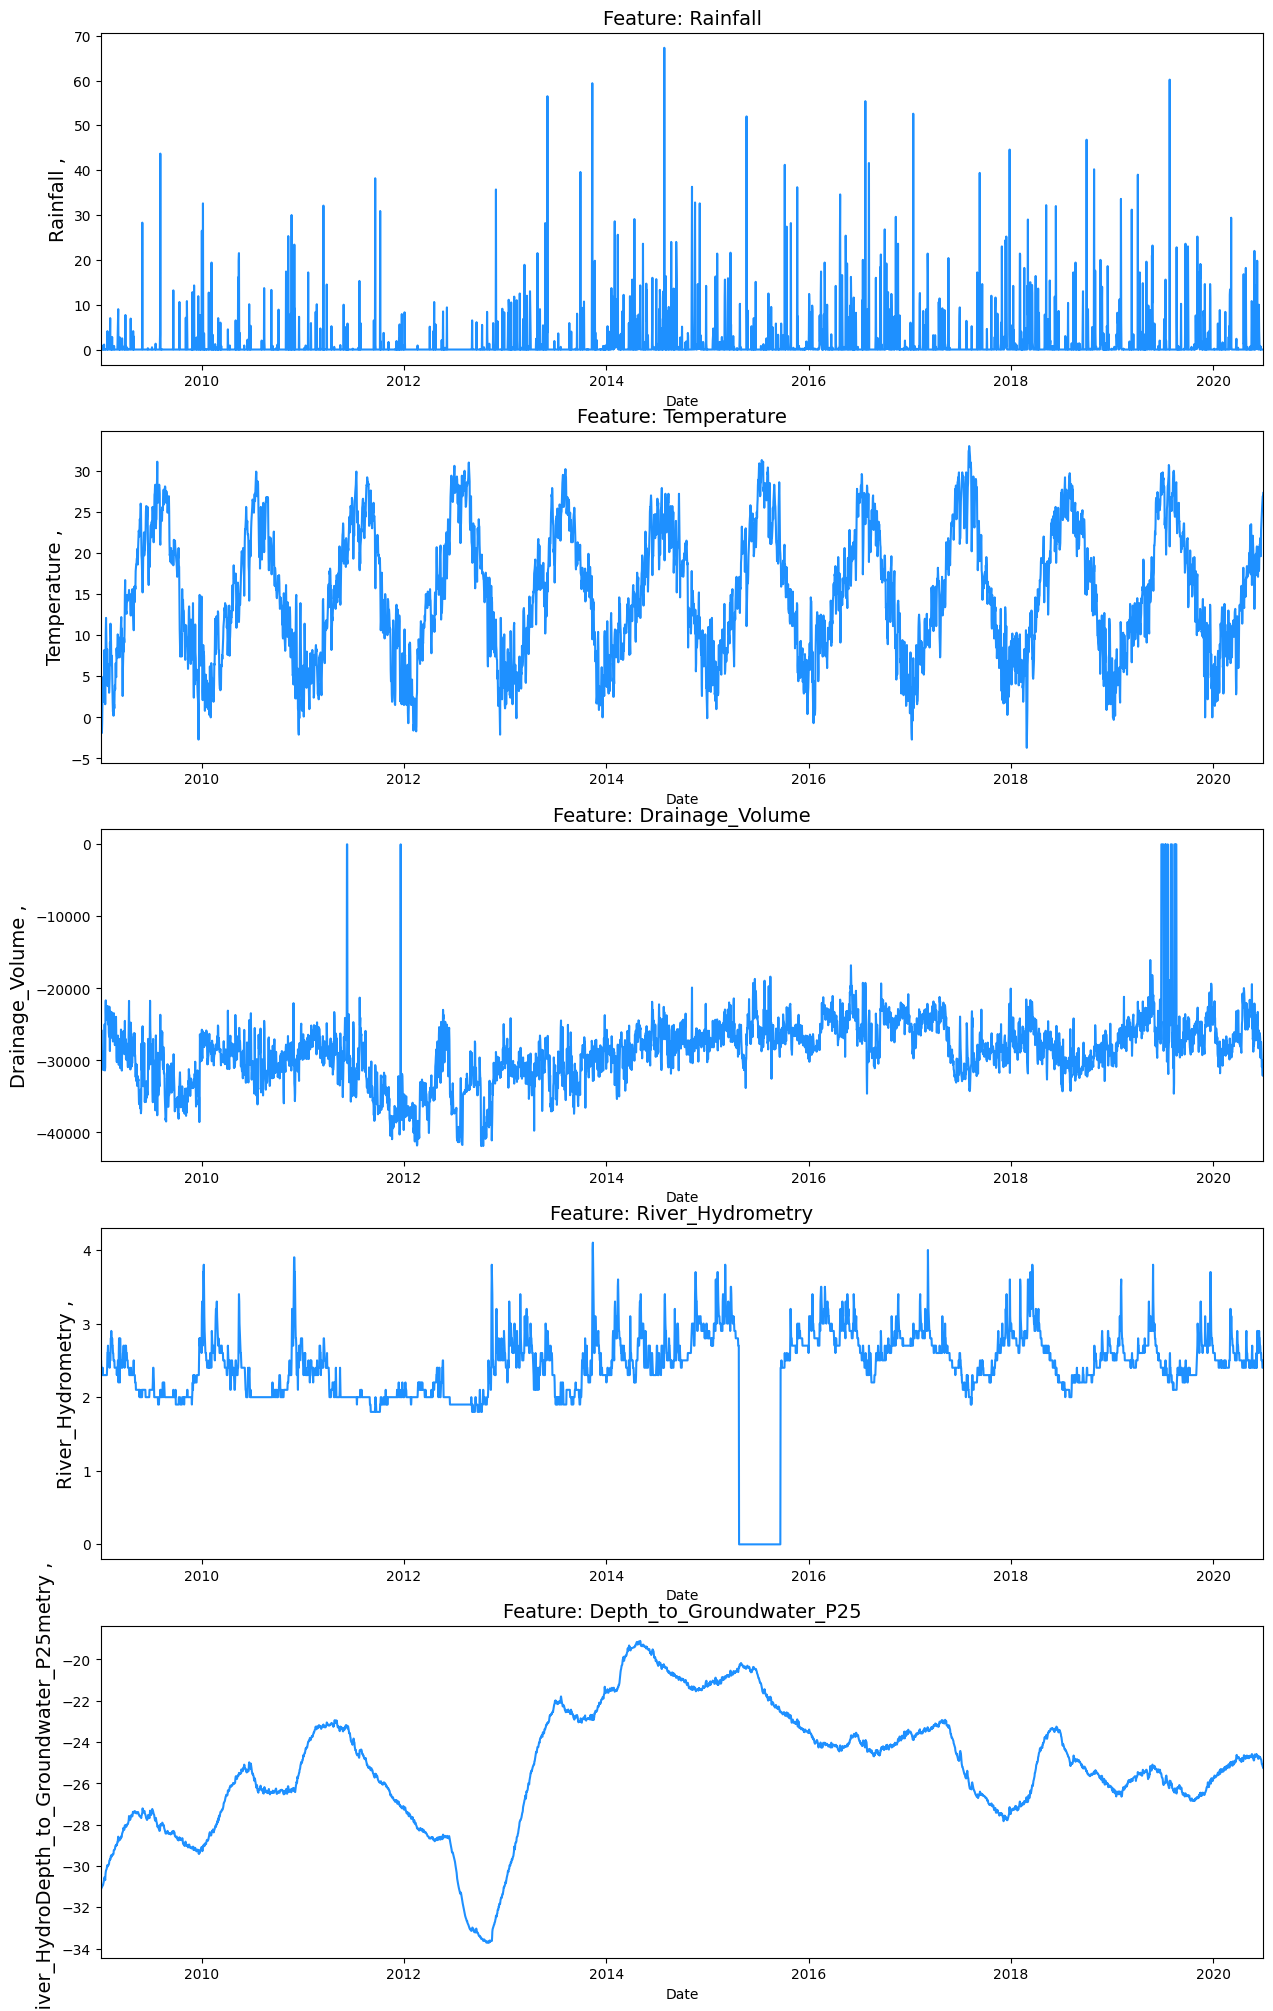

In [ ]:
# plotting the feature data associted with date
f , ax = plt.subplots(nrows=5,ncols=1,figsize=(15,25))

sns.lineplot(x=df.Date , y = df.Rainfall.fillna(np.inf) , ax=ax[0] , color='dodgerblue')
ax[0].set_title('Feature: Rainfall' , fontsize=14)
ax[0].set_ylabel(ylabel='Rainfall ,' , fontsize=14)

sns.lineplot(x=df.Date , y = df.Temperature.fillna(np.inf) , ax=ax[1] , color='dodgerblue')
ax[1].set_title('Feature: Temperature' , fontsize=14)
ax[1].set_ylabel(ylabel='Temperature ,' , fontsize=14)


sns.lineplot(x=df.Date , y = df.Drainage_Volume.fillna(np.inf) , ax=ax[2] , color='dodgerblue')
ax[2].set_title('Feature: Drainage_Volume' , fontsize=14)
ax[2].set_ylabel(ylabel='Drainage_Volume ,' , fontsize=14)


sns.lineplot(x=df.Date , y = df.River_Hydrometry.fillna(np.inf) , ax=ax[3] , color='dodgerblue')
ax[3].set_title('Feature: River_Hydrometry' , fontsize=14)
ax[3].set_ylabel(ylabel='River_Hydrometry ,' , fontsize=14)

sns.lineplot(x=df.Date , y = df.Depth_to_Groundwater_P25.fillna(np.inf) , ax=ax[4] , color='dodgerblue')
ax[4].set_title('Feature: Depth_to_Groundwater_P25' , fontsize=14)
ax[4].set_ylabel(ylabel='River_HydroDepth_to_Groundwater_P25metry ,' , fontsize=14)

for i in range(5):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.show()

In [ ]:
df.tail()

Date  Rainfall  Depth_to_Groundwater_P25  Temperature  \
4194 2020-06-26       0.0                    -25.07         25.7   
4195 2020-06-27       0.0                    -25.11         26.2   
4196 2020-06-28       0.0                    -25.19         26.9   
4197 2020-06-29       0.0                    -25.18         26.9   
4198 2020-06-30       0.0                    -25.25         27.3   

      Drainage_Volume  River_Hydrometry  
4194       -29930.688               2.5  
4195       -31332.960               2.4  
4196       -32120.928               2.4  
4197       -30602.880               2.4  
4198       -31878.144               2.4

In [ ]:
# sort values by timestamp
df  = df.sort_values(by='Date')

# check time intervals
df['Time_Interval'] = df.Date - df.Date.shift(1)

df[['Date' , 'Time_Interval']]

Date Time_Interval
0    2009-01-01           NaT
1    2009-01-02        1 days
2    2009-01-03        1 days
3    2009-01-04        1 days
4    2009-01-05        1 days
...         ...           ...
4194 2020-06-26        1 days
4195 2020-06-27        1 days
4196 2020-06-28        1 days
4197 2020-06-29        1 days
4198 2020-06-30        1 days

[4199 rows x 2 columns]

In [ ]:
print(f"{df['Time_Interval'].value_counts()}")
df = df.drop('Time_Interval', axis=1)

1 days    4198
Name: Time_Interval, dtype: int64


In [ ]:
df.head()

Date  Rainfall  Depth_to_Groundwater_P25  Temperature  \
0 2009-01-01       0.0                    -31.14          5.2   
1 2009-01-02       0.0                    -31.11          2.3   
2 2009-01-03       0.0                    -31.07          4.4   
3 2009-01-04       0.0                    -31.05          0.8   
4 2009-01-05       0.0                    -31.01         -1.9   

   Drainage_Volume  River_Hydrometry  
0       -24530.688               2.4  
1       -28785.888               2.5  
2       -25766.208               2.4  
3       -27919.296               2.4  
4       -29854.656               2.3

In [ ]:
df.isnull().sum()

Date                         0
Rainfall                     0
Depth_to_Groundwater_P25    27
Temperature                  0
Drainage_Volume              1
River_Hydrometry             0
dtype: int64

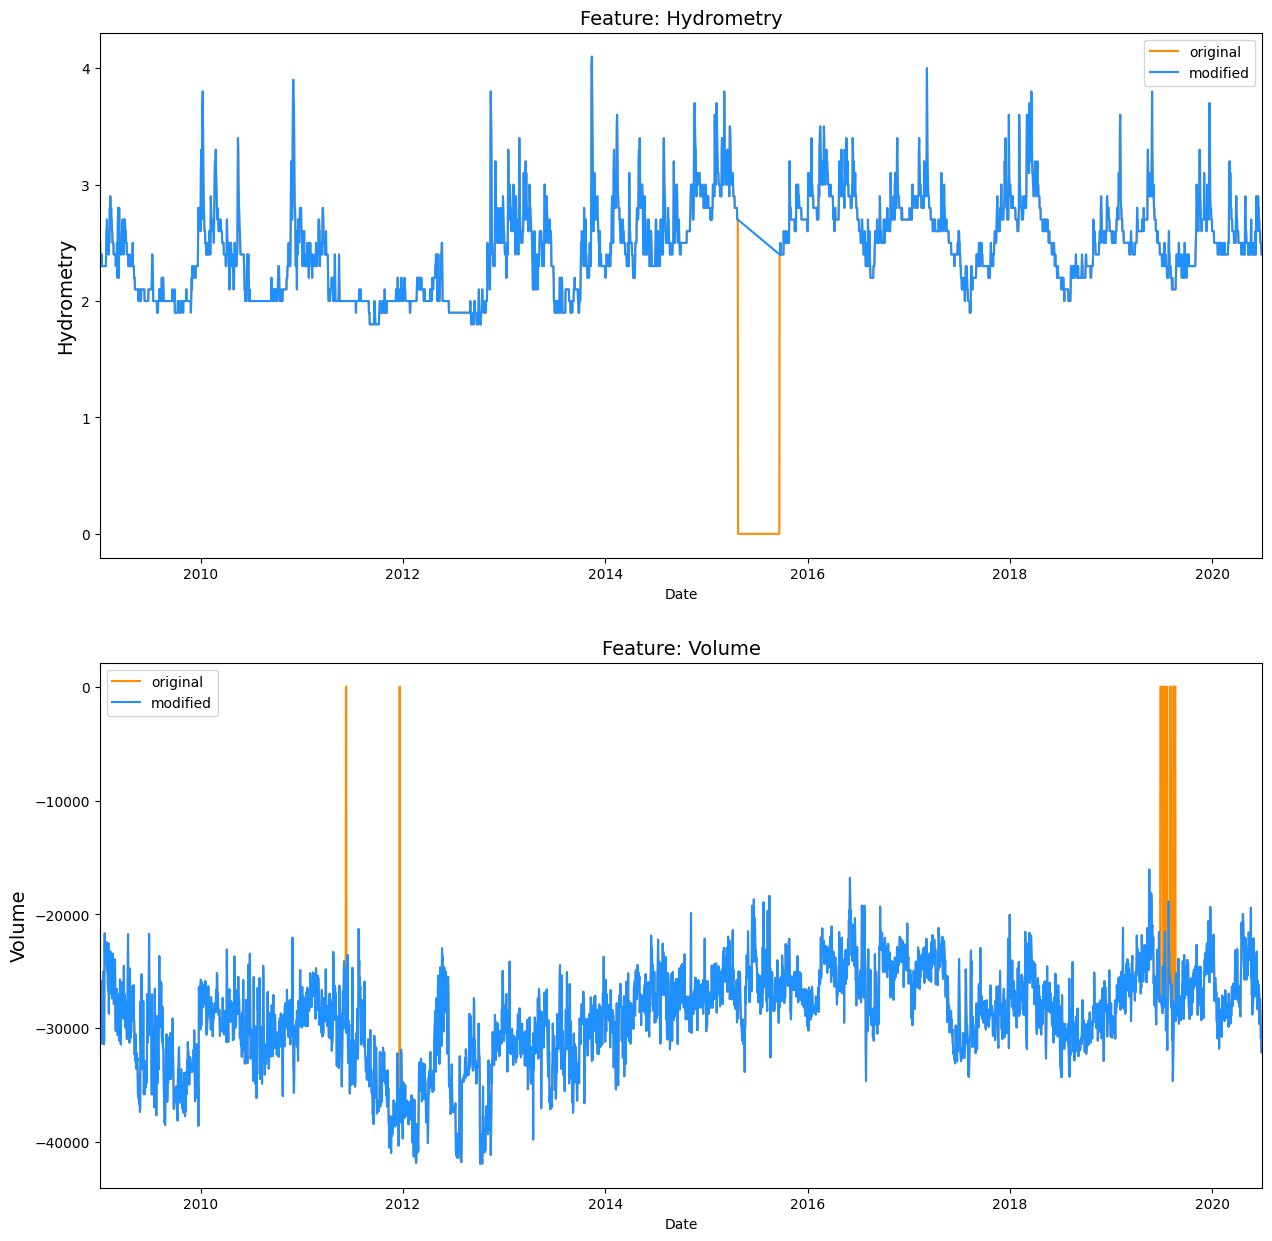

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
old = df.River_Hydrometry.copy()
df['River_Hydrometry'] = np.where((df.River_Hydrometry == 0),np.nan, df.River_Hydrometry)

sns.lineplot(x=df.Date, y=old.fillna(np.inf), ax=ax[0], color='darkorange', label = 'original')
sns.lineplot(x=df.Date, y=df.River_Hydrometry.fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)

old = df.Drainage_Volume.copy()
df['Drainage_Volume'] = np.where((df.Drainage_Volume == 0),np.nan, df.Drainage_Volume)

sns.lineplot(x=df.Date, y=old.fillna(np.inf), ax=ax[1], color='darkorange', label = 'original')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'modified')
ax[1].set_title('Feature: Volume', fontsize=14)
ax[1].set_ylabel(ylabel='Volume', fontsize=14)


for i in range(2):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.show()

# What to do with this missing values ? 

/tmp/ipykernel_197/925125436.py:7: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(13)


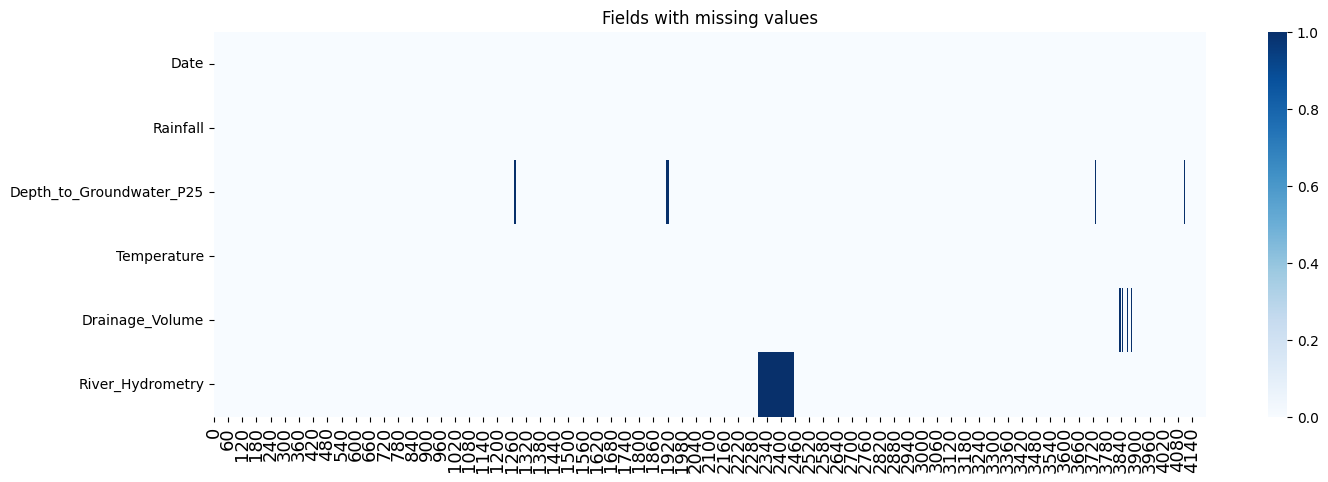

In [ ]:
f , ax = plt.subplots(1,1,figsize=(16,5))
sns.heatmap(df.T.isna() , cmap='Blues')

ax.set_title('Fields with missing values')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

**Option 1**: Fill NaN with Outlier or Zero

- In this specific example filling the missing value with an outlier value such as -999 is not a good idea. However, many notebooks in this challenge have been using -999.

- Option 2: Fill NaN with Mean Value

  Also in this example, we can see that filling NaNs with the mean value is also not sufficient.


 - Option 3: Fill NaN with Last Value with .ffill()


Filling NaNs with the last value is already a little bit better in this case.

- Option 4: Fill NaN with Linearly Interpolated Value with .interpolate()


Filling NaNs with the interpolated values is the best option in this small examlple but it requires knowledge of the neighouring values.

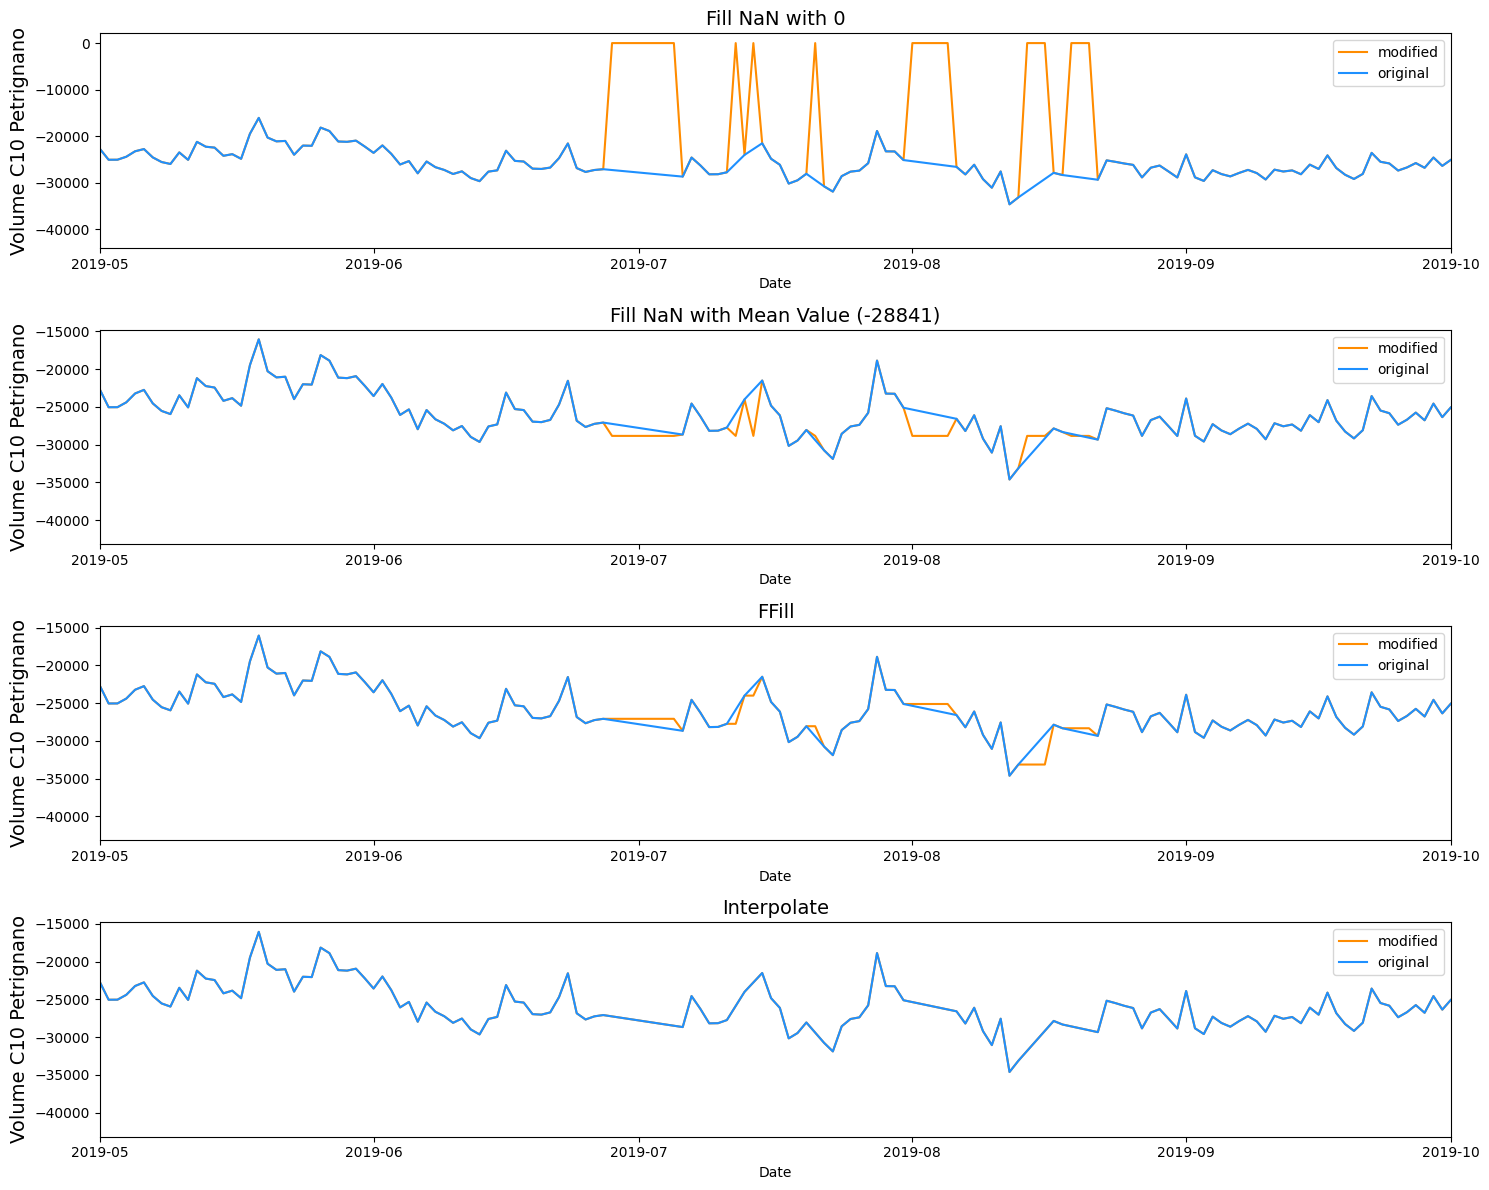

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

# Case 1: Fill NaN with 0
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(0), ax=ax[0], color='darkorange', label='modified')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[0], color='dodgerblue', label='original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

# Case 2: Fill NaN with Mean Value
mean_val = df.Drainage_Volume.mean()
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(mean_val), ax=ax[1], color='darkorange', label='modified')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[1], color='dodgerblue', label='original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_val:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

# Case 3: FFill
sns.lineplot(x=df.Date, y=df.Drainage_Volume.ffill(), ax=ax[2], color='darkorange', label='modified')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[2], color='dodgerblue', label='original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

# Case 4: Interpolate
sns.lineplot(x=df.Date, y=df.Drainage_Volume, ax=ax[3], color='darkorange', label='modified')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[3], color='dodgerblue', label='original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

# Set x-axis limits for all plots
for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])

plt.tight_layout()
plt.show()


In [ ]:
df['Drainage_Volume'] = df['Drainage_Volume'].interpolate()
df['River_Hydrometry'] = df['River_Hydrometry'].interpolate()
df['Depth_to_Groundwater_P25'] = df['Depth_to_Groundwater_P25'].interpolate()

In [ ]:
df.head()

Date  Rainfall  Depth_to_Groundwater_P25  Temperature  \
0 2009-01-01       0.0                    -31.14          5.2   
1 2009-01-02       0.0                    -31.11          2.3   
2 2009-01-03       0.0                    -31.07          4.4   
3 2009-01-04       0.0                    -31.05          0.8   
4 2009-01-05       0.0                    -31.01         -1.9   

   Drainage_Volume  River_Hydrometry  
0       -24530.688               2.4  
1       -28785.888               2.5  
2       -25766.208               2.4  
3       -27919.296               2.4  
4       -29854.656               2.3

Resampling
Resampling can provide additional information on the data. There are two types of resampling:

- Upsampling is when the frequency of samples is increased (e.g. days to hours)
- Downsampling is when the frequency of samples is decreased (e.g. days to weeks)
In this example, we will do some downsampling with the .resample() function.

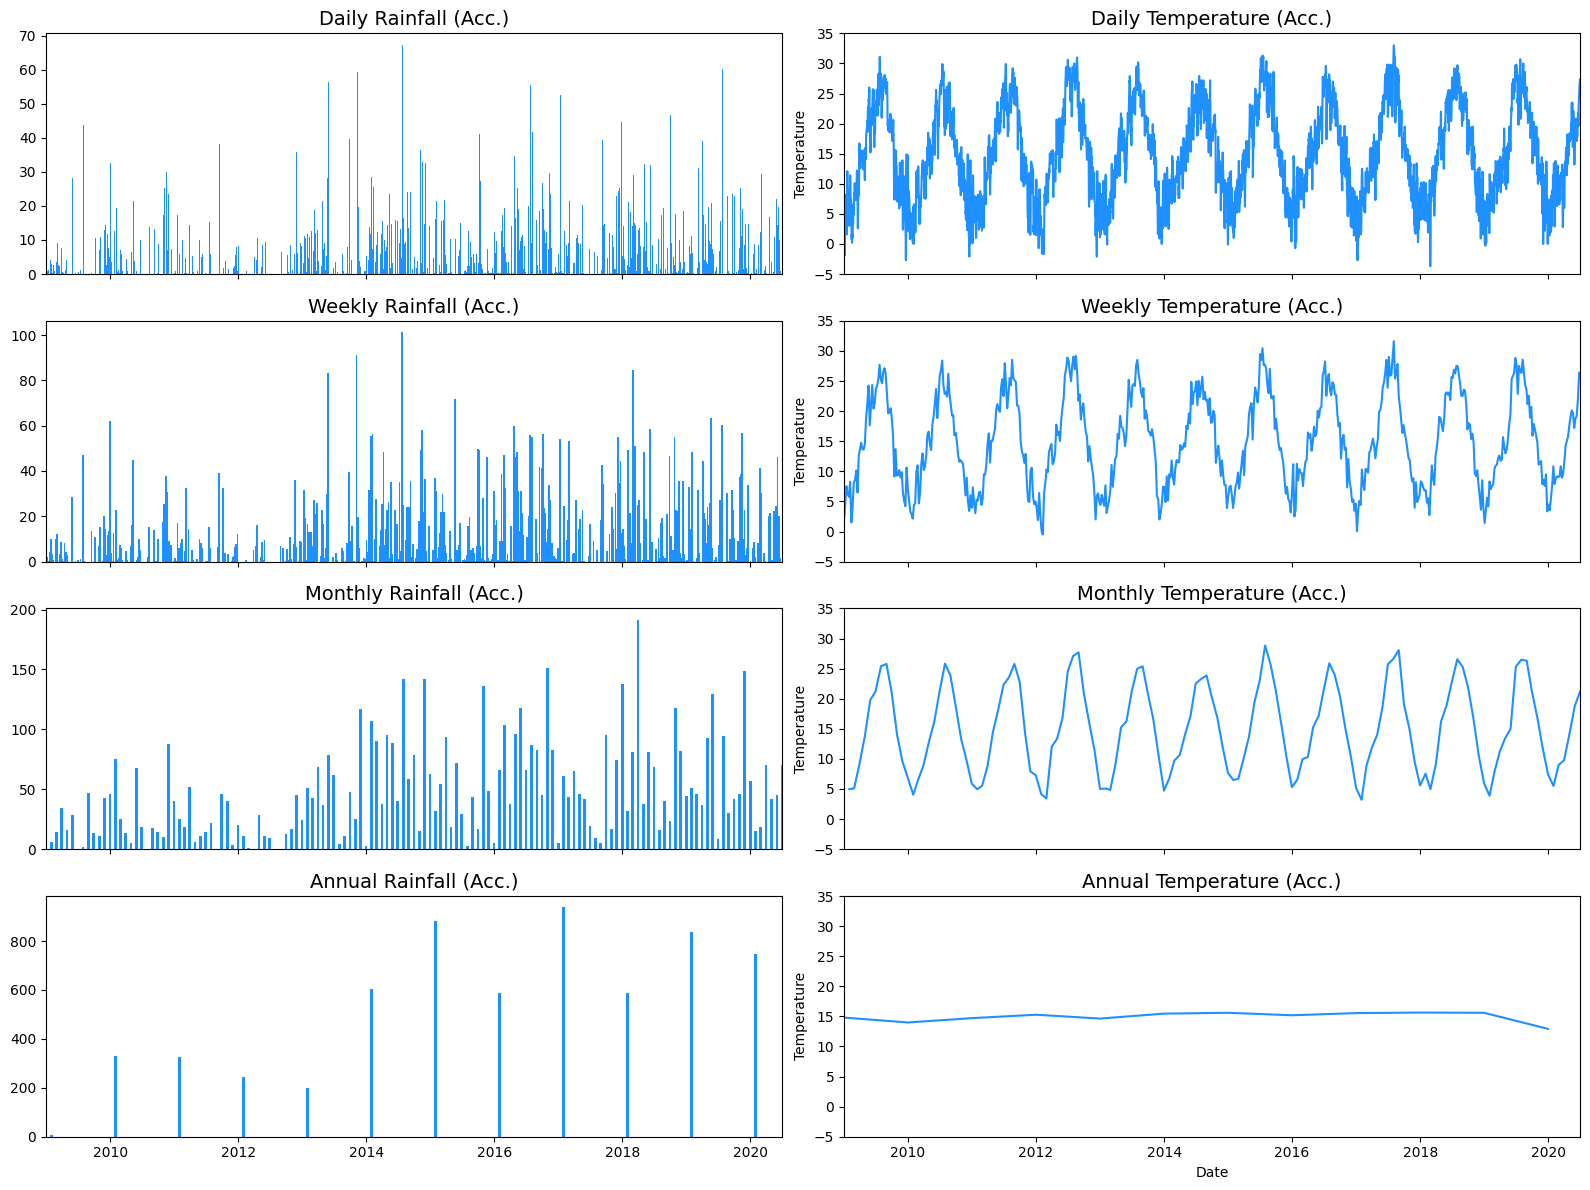

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

# Assuming you have a pandas DataFrame called 'df' with columns 'Date', 'Rainfall', and 'Temperature'

fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16, 12))

ax[0, 0].bar(df.Date, df.Rainfall, width=5, color='dodgerblue')
ax[0, 0].set_title('Daily Rainfall (Acc.)', fontsize=14)

resampled_df = df[['Date', 'Rainfall']].resample('7D', on='Date').sum().reset_index(drop=False)
ax[1, 0].bar(resampled_df.Date, resampled_df.Rainfall, width=10, color='dodgerblue')
ax[1, 0].set_title('Weekly Rainfall (Acc.)', fontsize=14)

resampled_df = df[['Date', 'Rainfall']].resample('M', on='Date').sum().reset_index(drop=False)
ax[2, 0].bar(resampled_df.Date, resampled_df.Rainfall, width=15, color='dodgerblue')
ax[2, 0].set_title('Monthly Rainfall (Acc.)', fontsize=14)

resampled_df = df[['Date', 'Rainfall']].resample('12M', on='Date').sum().reset_index(drop=False)
ax[3, 0].bar(resampled_df.Date, resampled_df.Rainfall, width=20, color='dodgerblue')
ax[3, 0].set_title('Annual Rainfall (Acc.)', fontsize=14)

for i in range(4):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x=df.Date, y=df.Temperature, color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

resampled_df = df[['Date', 'Temperature']].resample('7D', on='Date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df.Date, y=resampled_df.Temperature, color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

resampled_df = df[['Date', 'Temperature']].resample('M', on='Date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df.Date, y=resampled_df.Temperature, color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

resampled_df = df[['Date', 'Temperature']].resample('365D', on='Date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df.Date, y=resampled_df.Temperature, color='dodgerblue', ax=ax[3, 1])
ax[3, 1].set_title('Annual Temperature (Acc.)', fontsize=14)

for i in range(4):
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_ylim([-5, 35])

plt.tight_layout()
plt.show()


In [ ]:
df_downsample = df[['Date', 'Depth_to_Groundwater_P25', 'Temperature',
       'Drainage_Volume', 'River_Hydrometry']].resample('7D' , on='Date').mean().reset_index(drop=False)
df_downsample['Rainfall'] = df[['Date' , 'Rainfall']].resample('7D' , on='Date').sum().reset_index(drop=False)[['Rainfall']]

df = df_downsample 

Stationarity
Some time-series models, such as such as ARIMA, assume that the underlying data is stationary. Stationarity describes that the time-series has

constant mean and mean is not time-dependent
constant variance and variance is not time-dependent
constant covariance and covariance is not time-dependent
If a time series has a specific (stationary) behavior over a given time interval, then it can be assumed that the time series will behave the same at a later time.
Time series with trend and/or seasonality are not stationary. Trend indicates that the mean is not constant over time and seasonality indicates that the variance is not constant over time.

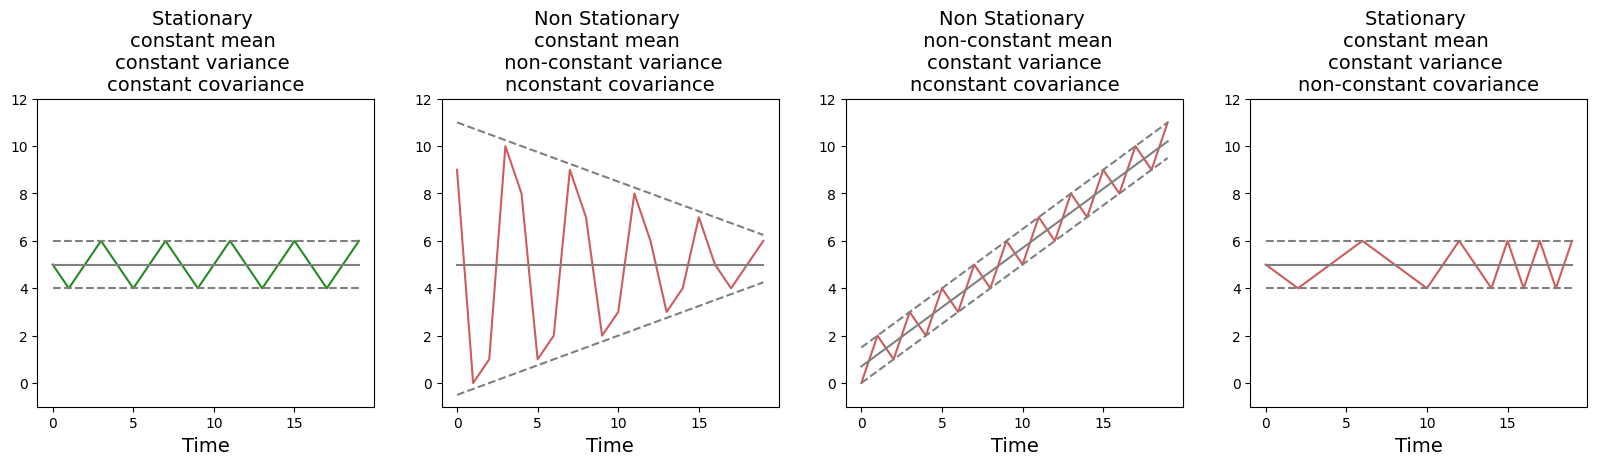

In [ ]:
t = np.linspace(0, 19, 20)

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,4))
stationary = [5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6,]
sns.lineplot(x=t, y=stationary, ax=ax[0], color='forestgreen')
sns.lineplot(x=t, y=5, ax=ax[0], color='grey')
sns.lineplot(x=t, y=6, ax=ax[0], color='grey')
sns.lineplot(x=t, y=4, ax=ax[0], color='grey')
ax[0].lines[2].set_linestyle("--")
ax[0].lines[3].set_linestyle("--")
ax[0].set_title(f'Stationary \nconstant mean \nconstant variance \nconstant covariance', fontsize=14)

nonstationary1 = [ 9, 0, 1, 10, 8, 1, 2, 9, 7, 2, 3, 8, 6, 3, 4, 7, 5, 4, 5, 6]
sns.lineplot(x=t, y=nonstationary1, ax=ax[1], color='indianred' )
sns.lineplot(x=t, y=5, ax=ax[1], color='grey')
sns.lineplot(x=t, y=t*0.25-0.5, ax=ax[1], color='grey')
sns.lineplot(x=t, y=t*(-0.25)+11, ax=ax[1], color='grey')
ax[1].lines[2].set_linestyle("--")
ax[1].lines[3].set_linestyle("--")
ax[1].set_title(f'Non Stationary \nconstant mean \n non-constant variance\nnconstant covariance', fontsize=14)

nonstationary2 = [0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 6, 8, 7, 9, 8, 10, 9, 11,]
sns.lineplot(x=t, y=nonstationary2, ax=ax[2], color='indianred' )
sns.lineplot(x=t, y=t*0.5+0.7, ax=ax[2], color='grey')
sns.lineplot(x=t, y=t*0.5, ax=ax[2], color='grey')
sns.lineplot(x=t, y=t*0.5+1.5, ax=ax[2], color='grey')
ax[2].lines[2].set_linestyle("--")
ax[2].lines[3].set_linestyle("--")
ax[2].set_title(f'Non Stationary \n non-constant mean\nconstant variance\nnconstant covariance', fontsize=14)

nonstationary3 = [5, 4.5, 4, 4.5, 5, 5.5, 6, 5.5, 5, 4.5, 4, 5, 6, 5, 4, 6, 4, 6, 4, 6,]
sns.lineplot(x=t, y=nonstationary3, ax=ax[3], color='indianred')
sns.lineplot(x=t, y=5, ax=ax[3], color='grey')
sns.lineplot(x=t, y=6, ax=ax[3], color='grey')
sns.lineplot(x=t, y=4, ax=ax[3], color='grey')
ax[3].lines[2].set_linestyle("--")
ax[3].lines[3].set_linestyle("--")
ax[3].set_title(f'Stationary \nconstant mean \nconstant variance \nnon-constant covariance', fontsize=14)

for i in range(4):
    ax[i].set_ylim([-1, 12])
    ax[i].set_xlabel('Time', fontsize=14)

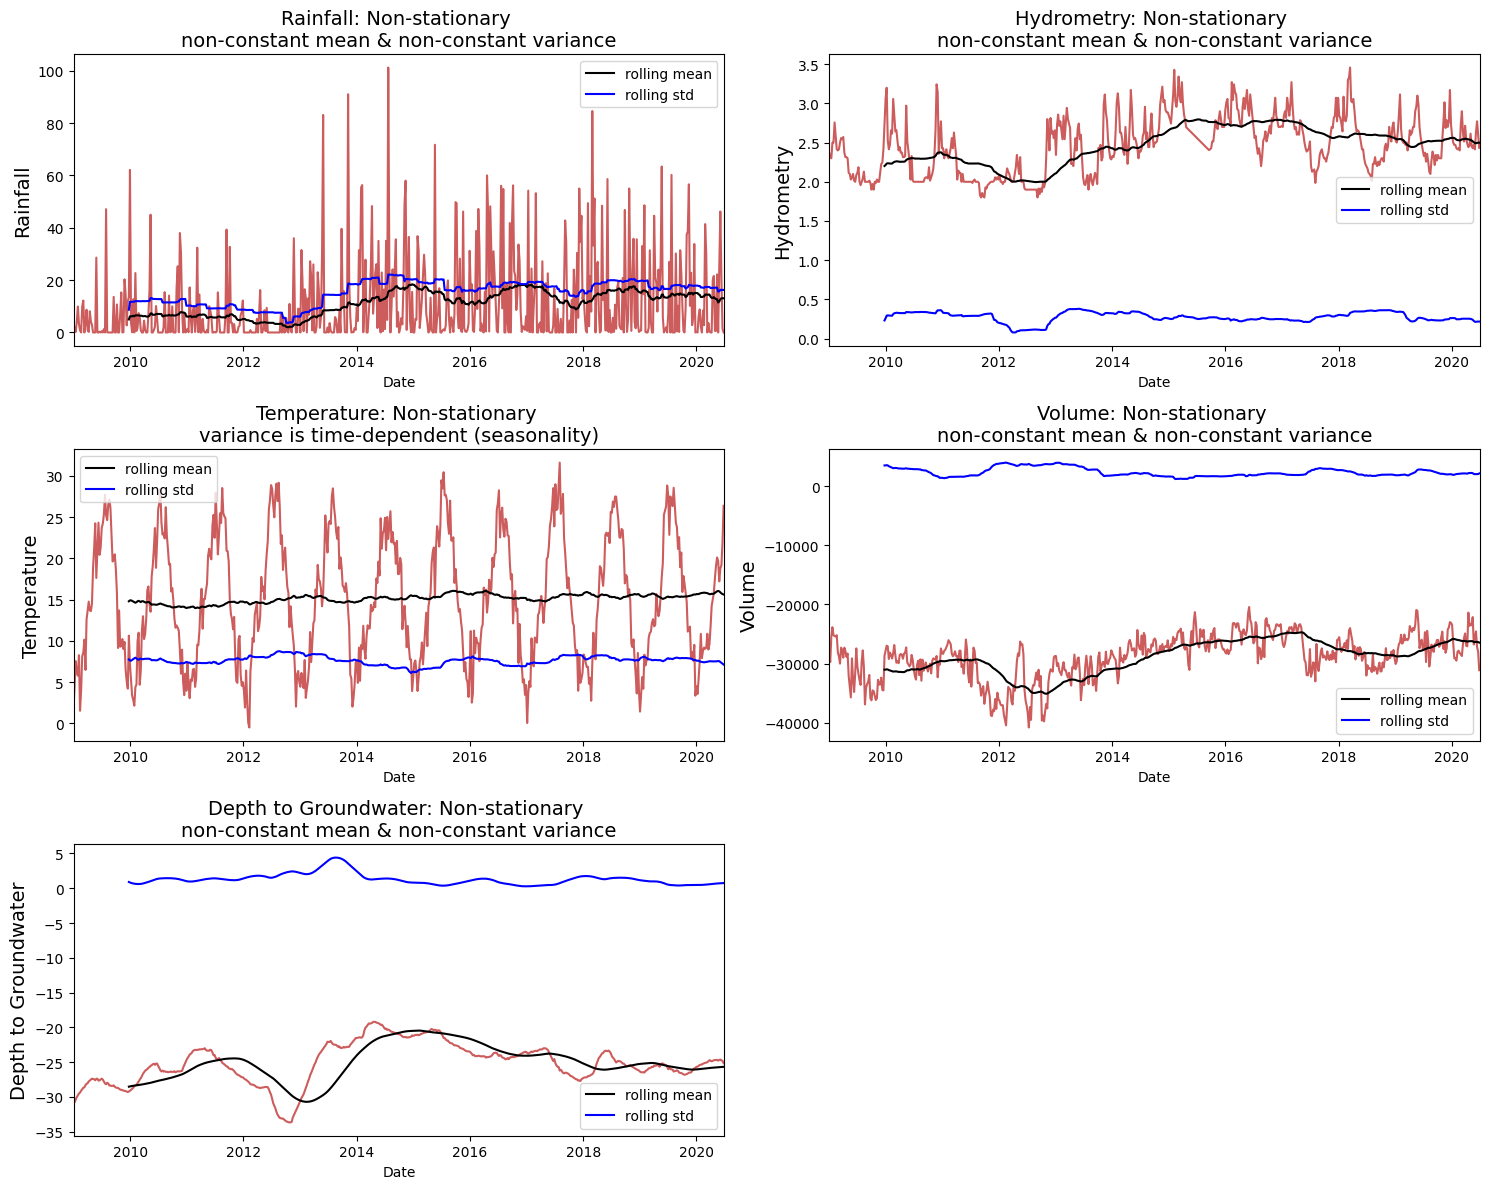

In [ ]:
rolling_window = 52
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

sns.lineplot(x=df.Date, y=df.Rainfall, ax=ax[0, 0], color='indianred')
sns.lineplot(x=df.Date, y=df.Rainfall.rolling(rolling_window).mean(), ax=ax[0, 0], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.Rainfall.rolling(rolling_window).std(), ax=ax[0, 0], color='blue', label='rolling std')
ax[0, 0].set_title('Rainfall: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 0].set_ylabel(ylabel='Rainfall', fontsize=14)

sns.lineplot(x=df.Date, y=df.Temperature, ax=ax[1, 0], color='indianred')
sns.lineplot(x=df.Date, y=df.Temperature.rolling(rolling_window).mean(), ax=ax[1, 0], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.Temperature.rolling(rolling_window).std(), ax=ax[1, 0], color='blue', label='rolling std')
ax[1, 0].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1, 0].set_ylabel(ylabel='Temperature', fontsize=14)

sns.lineplot(x=df.Date, y=df.River_Hydrometry, ax=ax[0, 1], color='indianred')
sns.lineplot(x=df.Date, y=df.River_Hydrometry.rolling(rolling_window).mean(), ax=ax[0, 1], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.River_Hydrometry.rolling(rolling_window).std(), ax=ax[0, 1], color='blue', label='rolling std')
ax[0, 1].set_title('Hydrometry: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 1].set_ylabel(ylabel='Hydrometry', fontsize=14)

sns.lineplot(x=df.Date, y=df.Drainage_Volume, ax=ax[1, 1], color='indianred')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.rolling(rolling_window).mean(), ax=ax[1, 1], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.rolling(rolling_window).std(), ax=ax[1, 1], color='blue', label='rolling std')
ax[1, 1].set_title('Volume: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 1].set_ylabel(ylabel='Volume', fontsize=14)

sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P25, ax=ax[2, 0], color='indianred')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P25.rolling(rolling_window).mean(), ax=ax[2, 0], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P25.rolling(rolling_window).std(), ax=ax[2, 0], color='blue', label='rolling std')
ax[2, 0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[2, 0].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)


for i in range(3):
    ax[i,0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i,1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

Next, we will check the underlying statistics. For this we will split the time series into two sections and check the mean and the variance. You could do more partitions if you wanted.

With this method, Temperature and River_Hydrometry show somewhat similar (constant) mean and variance and could be seen as stationary. However, with this method, we are not able to see the seasonality in the Temperature feature.

num_partitions = 2
partition_length = int(len(df) / num_partitions)

partition1_mean = df.head(partition_length).mean()
partition1_var = df.head(partition_length).var()
partition2_mean = df.tail(partition_length).mean()
partition2_var = df.tail(partition_length).var()

In [ ]:
num_partitions = 2
partition_length = int(len(df) / num_partitions)

partition1_mean = df.head(partition_length).mean()
partition1_var = df.head(partition_length).var()
partition2_mean = df.tail(partition_length).mean()
partition2_var = df.tail(partition_length).var()

/tmp/ipykernel_197/1203610497.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  partition1_mean = df.head(partition_length).mean()
/tmp/ipykernel_197/1203610497.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  partition2_mean = df.tail(partition_length).mean()


Using a threshold such as +/- 3 units provides a small margin of error when comparing numerical values. It accounts for minor variations due to floating-point precision or small differences that may arise during calculations or data processing.

In [ ]:
stationarity_test = pd.concat([partition1_mean, partition2_mean, partition1_var, partition2_var], axis=1)
stationarity_test.columns = ['Partition 1 Mean', 'Partition 2 Mean', 'Partition 1 Variance', 'Partition 2 Variance']

def highlight_greater(x):
    temp = x.copy()
    temp = temp.round(0).astype(int)
    m1 = (temp['Partition 1 Mean'] == temp['Partition 2 Mean'])
    m2 = (temp['Partition 1 Variance'] == temp['Partition 2 Variance'])
    m3 = (temp['Partition 1 Mean'] < temp['Partition 2 Mean']+3) & (temp['Partition 1 Mean'] > temp['Partition 2 Mean']-3)
    m4 = (temp['Partition 1 Variance'] < temp['Partition 2 Variance']+3) & (temp['Partition 1 Variance'] > temp['Partition 2 Variance']-3)

    df1 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    #rewrite values by boolean masks
    df1['Partition 1 Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'), df1['Partition 1 Mean'])
    df1['Partition 2 Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'), df1['Partition 2 Mean'])
    df1['Partition 1 Mean'] = np.where(m3, 'background-color: {}'.format('gold'), df1['Partition 1 Mean'])
    df1['Partition 2 Mean'] = np.where(m3, 'background-color: {}'.format('gold'), df1['Partition 2 Mean'])
    df1['Partition 1 Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df1['Partition 1 Mean'])
    df1['Partition 2 Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df1['Partition 2 Mean'])

    df1['Partition 1 Variance'] = np.where(~m2, 'background-color: {}'.format('salmon'), df1['Partition 1 Variance'])
    df1['Partition 2 Variance'] = np.where(~m2, 'background-color: {}'.format('salmon'), df1['Partition 2 Variance'])
    df1['Partition 1 Variance'] = np.where(m4, 'background-color: {}'.format('gold'), df1['Partition 1 Variance'])
    df1['Partition 2 Variance'] = np.where(m4, 'background-color: {}'.format('gold'), df1['Partition 2 Variance'])
    df1['Partition 1 Variance'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df1['Partition 1 Variance'])
    df1['Partition 2 Variance'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df1['Partition 2 Variance'])

    return df1


stationarity_test.style.apply(highlight_greater, axis=None).format("{:20,.0f}")

Let's evaluate the histograms. Since we are looking at the mean and variance, we are expecting that the data conforms to a Gaussian distribution (bell shaped distribution) in case of stationarity.



/tmp/ipykernel_197/1238789219.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Rainfall.fillna(np.inf), ax=ax[0, 0], color='indianred')
/tmp/ipykernel_197/1238789219.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Temperature.fillna(np.inf), ax=ax[1, 0], color='indianred')
/tmp/ipyk

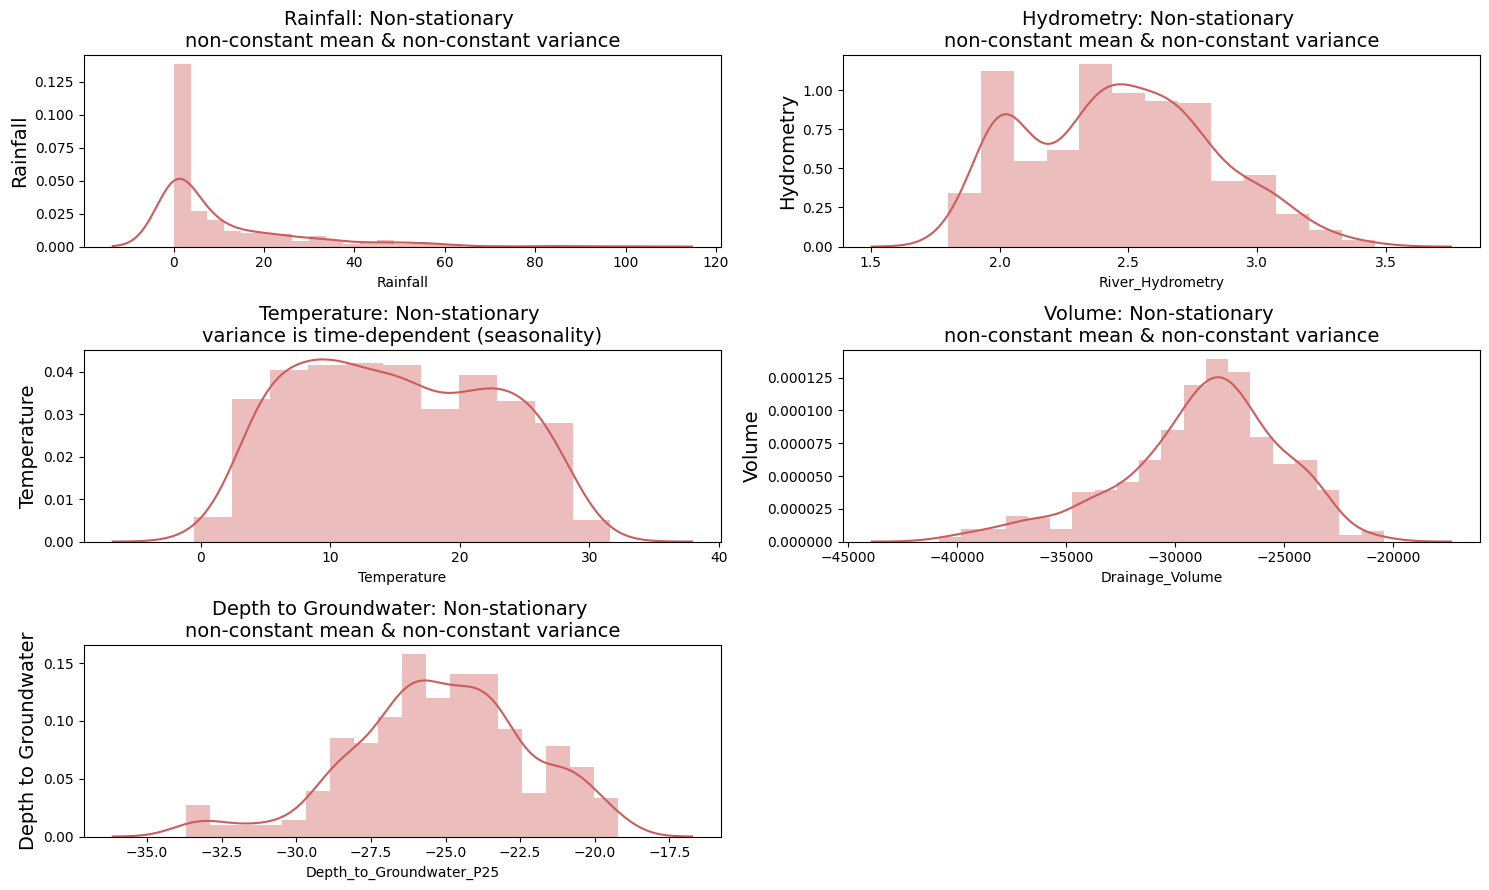

In [ ]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

sns.distplot(df.Rainfall.fillna(np.inf), ax=ax[0, 0], color='indianred')
ax[0, 0].set_title('Rainfall: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 0].set_ylabel(ylabel='Rainfall', fontsize=14)

sns.distplot(df.Temperature.fillna(np.inf), ax=ax[1, 0], color='indianred')
ax[1, 0].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1, 0].set_ylabel(ylabel='Temperature', fontsize=14)

sns.distplot(df.River_Hydrometry.fillna(np.inf), ax=ax[0, 1], color='indianred')
ax[0, 1].set_title('Hydrometry: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 1].set_ylabel(ylabel='Hydrometry', fontsize=14)

sns.distplot(df.Drainage_Volume.fillna(np.inf), ax=ax[1, 1], color='indianred')
ax[1, 1].set_title('Volume: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 1].set_ylabel(ylabel='Volume', fontsize=14)

sns.distplot(df.Depth_to_Groundwater_P25.fillna(np.inf), ax=ax[2, 0], color='indianred')
ax[2, 0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[2, 0].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).

Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).

If the null hypothesis can be rejected, we can conclude that the time series is stationary.

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

**p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
**p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

**ADF statistic > critical value**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
**ADF statistic < critical value**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
! pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 47.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from statsmodels.tsa.stattools import adfuller

result =  adfuller(df.Depth_to_Groundwater_P25.values)
adf_stat = result[0]
p_val = result[1]
critic_val_1 = result[4]['1%']
critic_val_5 = result[4]['5%']
critic_val_10 = result[4]['10%']

In [ ]:
result

(-2.8802016493166622,
 0.04769919092020864,
 7,
 592,
 {'1%': -3.441444394224128,
  '5%': -2.8664345376276454,
  '10%': -2.569376663737217},
 -734.3154255877625)

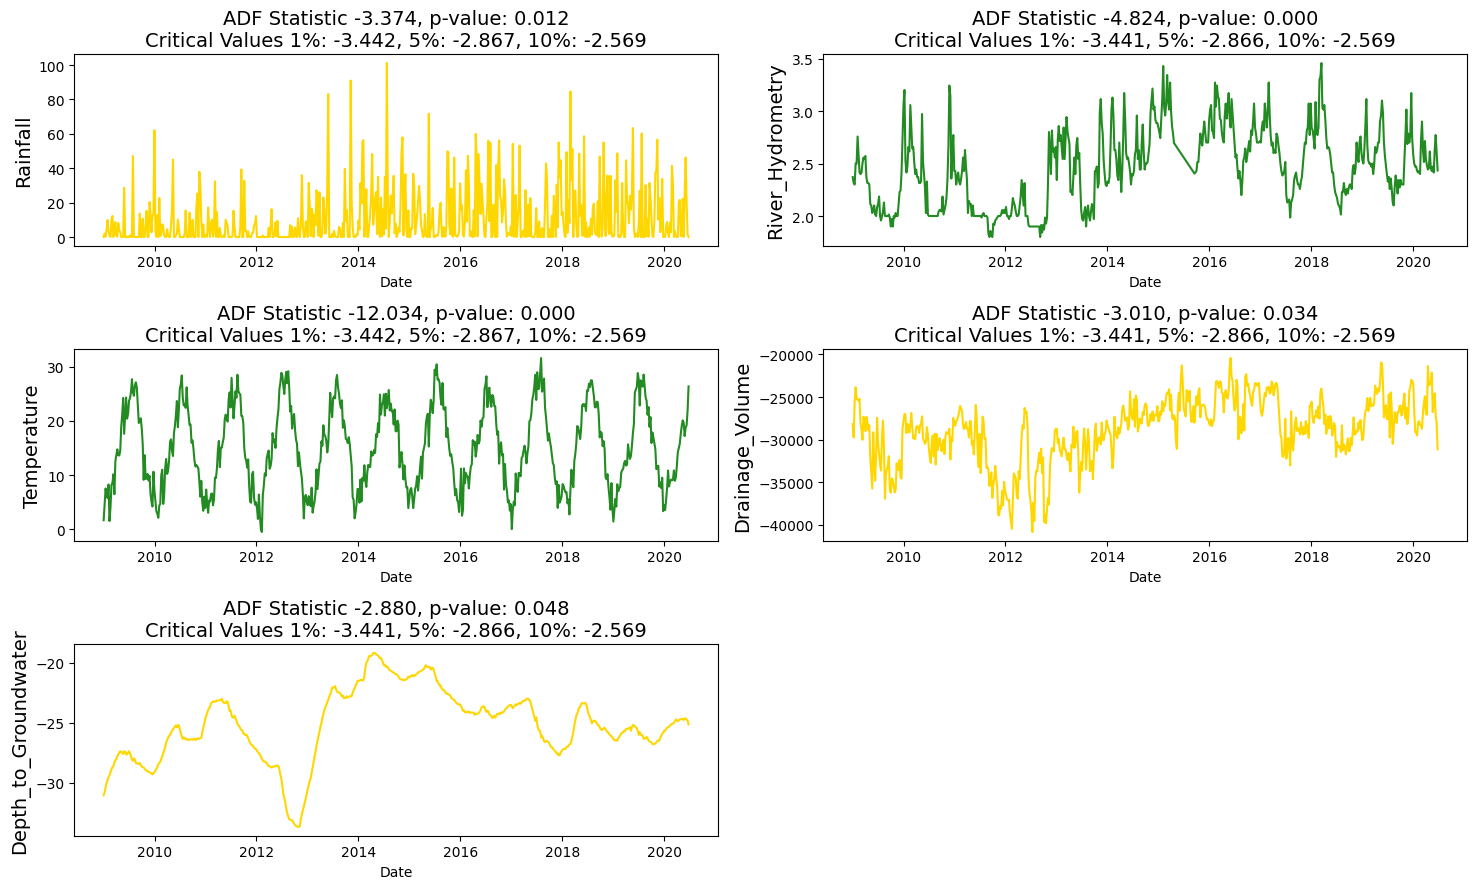

In [ ]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    sns.lineplot(x=df.Date, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df.Rainfall.values, 'Rainfall', ax[0, 0])
visualize_adfuller_results(df.Temperature.values, 'Temperature', ax[1, 0])
visualize_adfuller_results(df.River_Hydrometry.values, 'River_Hydrometry', ax[0, 1])
visualize_adfuller_results(df.Drainage_Volume.values, 'Drainage_Volume', ax[1, 1])
visualize_adfuller_results(df.Depth_to_Groundwater_P25.values, 'Depth_to_Groundwater', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

If the data is not stationary but we want to use a model that requires with characteristic, the data has to be transformed. However, if the data is not stationary to begin with, we should rethink the choice of model.

The two most common methods to achieve stationarity are:

Transformation: e.g. log or square root to stabilize non-constant variance
Differencing: subtracts the current value from the previous

You are absolutely right! Stationarity is a crucial assumption in many time series models, and if the data is not stationary, it can lead to incorrect conclusions and predictions. As you mentioned, there are two common methods to achieve stationarity: transformation and differencing.

# Transformation:
 - Transformation involves applying a mathematical function to the time series data to stabilize the   variance.  The goal is to reduce or remove the trend and seasonality, making the data more consistent over time.
 Common transformation methods include taking the logarithm, square root, or other power transformations. These transformations are especially useful when the data shows a trend or its variance increases over time.
For example, if the data shows exponential growth, applying a logarithmic transformation can help convert it into a linear pattern, making it easier to analyze and model.

# differencing:
Differencing is another technique used to achieve stationarity by subtracting the current value from the previous value in the time series. This helps to remove the trend component, resulting in a stationary time series.
First-order differencing involves subtracting the value at time 't' from the value at time 't-1'. In general, differencing is done with lags to remove trends of different orders.
Differencing can be useful when the data has a changing mean over time or a trend that needs to be eliminated for better modeling.

Both methods aim to make the time series stationary by removing trends and reducing variance over time. After applying these methods, you can then use models that assume stationarity, such as Autoregressive Integrated Moving Average (ARIMA) or Seasonal Autoregressive Integrated Moving-Average (SARIMA), to make predictions or analyze the data.

It's important to note that choosing the appropriate method depends on the nature of the data and the specific problem at hand. Sometimes, multiple transformations or differencing steps may be required to achieve stationarity. Additionally, if stationarity cannot be achieved, alternative models that work with non-stationary data, such as seasonal decomposition of time series (STL) or exponential smoothing methods, can be considered. Overall, careful preprocessing and analysis are essential to ensure the best choice of model for time series data.

In [ ]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['Depth_to_Groundwater_log'] = np.log(abs(df.Depth_to_Groundwater_P25))

The Augmented Dickey-Fuller (ADF) test is commonly used to check for the presence of a unit root in a time series, which indicates non-stationarity. However, the test assumes that the data being analyzed is stationary or follows a stationary process.

If the 'Depth_to_Groundwater_P25' data contains negative values, it might not satisfy the assumption of stationarity because the ADF test assumes the data is non-negative. Taking the absolute value of the data using abs() ensures that all values are non-negative, and thus, it makes the data conform to the assumption required by the ADF test.

By taking the absolute value of the 'Depth_to_Groundwater_P25' data, the ADF test can be more applicable and valid in assessing the stationarity of the time series, even if the original data has negative values. The test is then conducted on the transformed data, which is the absolute values of the 'Depth_to_Groundwater_P25', to determine if the time series is stationary or not

/tmp/ipykernel_197/4149765734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Depth_to_Groundwater_log, ax=ax[0, 1])
/tmp/ipykernel_197/4149765734.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Depth_to_Groundwater_log, ax=ax[1, 1])


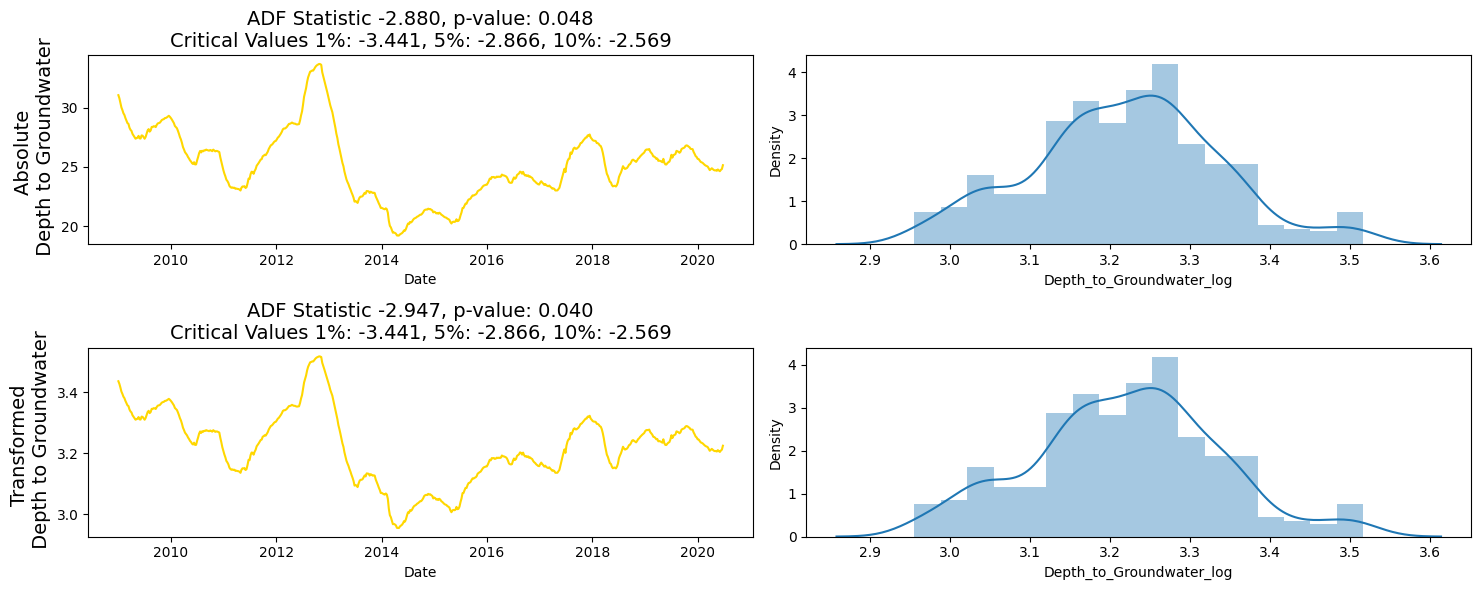

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
visualize_adfuller_results(abs(df.Depth_to_Groundwater_P25), 'Absolute \n Depth to Groundwater', ax[0, 0])

sns.distplot(df.Depth_to_Groundwater_log, ax=ax[0, 1])
visualize_adfuller_results(df.Depth_to_Groundwater_log, 'Transformed \n Depth to Groundwater', ax[1, 0])

sns.distplot(df.Depth_to_Groundwater_log, ax=ax[1, 1])

plt.tight_layout()
plt.show()

In [ ]:
# Differencing can be done in different orders:

# First order differencing: linear trends with 𝑧𝑖=𝑦𝑖−𝑦𝑖−1
# Second-order differencing: quadratic trends with 𝑧𝑖=(𝑦𝑖−𝑦𝑖−1)−(𝑦𝑖−1−𝑦𝑖−2)
# and so on...
# First Order Differencing
ts_diff = np.diff(df.Depth_to_Groundwater_P25)
df['Depth_to_Groundwater_diff_1'] = np.append([0], ts_diff)

# Second Order Differencing
ts_diff = np.diff(df.Depth_to_Groundwater_diff_1)
df['Depth_to_Groundwater_diff_2'] = np.append([0], ts_diff)

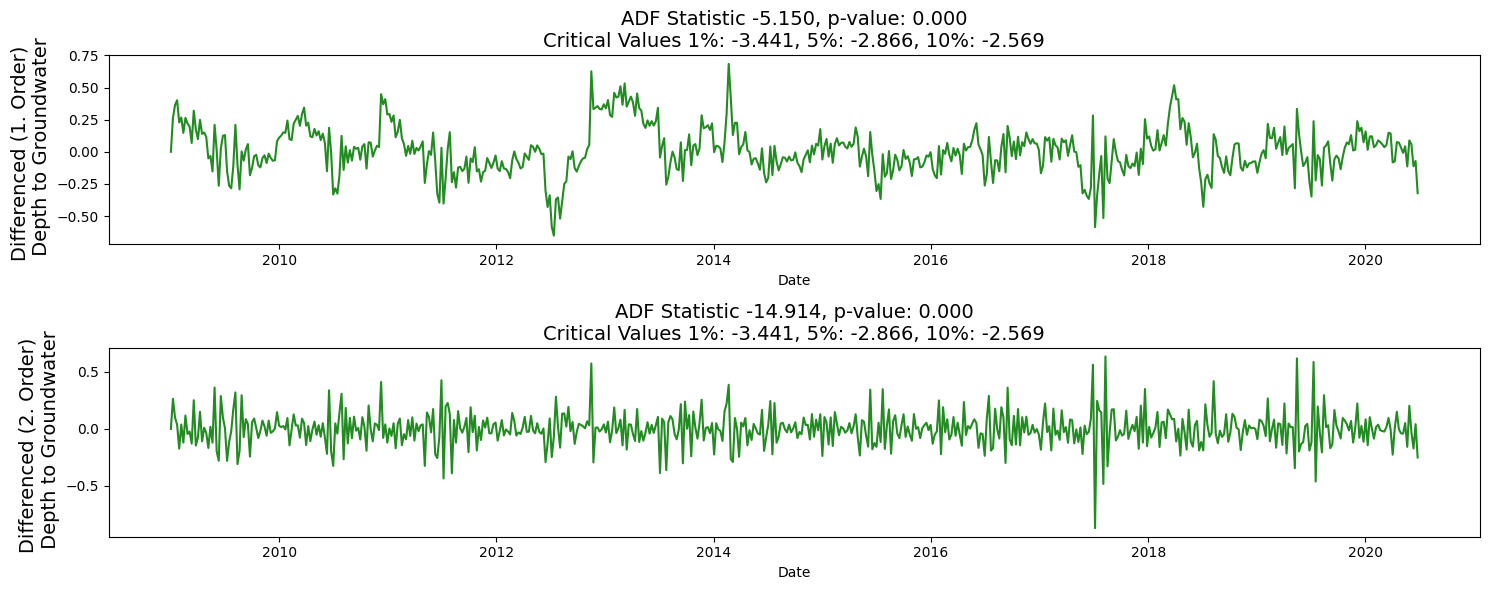

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))

visualize_adfuller_results(df.Depth_to_Groundwater_diff_1, 'Differenced (1. Order) \n Depth to Groundwater', ax[0])
visualize_adfuller_results(df.Depth_to_Groundwater_diff_2, 'Differenced (2. Order) \n Depth to Groundwater', ax[1])
plt.tight_layout()
plt.show()

The differencing can be reverted if the the first value before differencing is known. In this case, we can accumulate all values with the function .cumsum() and add the first value of the original time series.



To revert the differencing and reconstruct the original time series, you can use the .cumsum() function to compute the cumulative sum of the differenced values and then add the base value (the first value before differencing). Let's do that:



df.Depth_to_Groundwater.equals(df.Depth_to_Groundwater_diff_1.cumsum() + df.Depth_to_Groundwater.iloc[0])

In [ ]:
df.Depth_to_Groundwater_P25.equals(df.Depth_to_Groundwater_diff_1.cumsum() + df.Depth_to_Groundwater_P25.iloc[0])


True

# Feature Engineering
- Time Features

In [ ]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['day_of_year'] = pd.DatetimeIndex(df['Date']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['Date']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
df['season'] = df.month%12 // 3 + 1

df[['Date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

/tmp/ipykernel_197/2450902255.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week_of_year'] = pd.DatetimeIndex(df['Date']).weekofyear


Date  year  month  day  day_of_year  week_of_year  quarter  season
0 2009-01-01  2009      1    1            1             1        1       1
1 2009-01-08  2009      1    8            8             2        1       1
2 2009-01-15  2009      1   15           15             3        1       1
3 2009-01-22  2009      1   22           22             4        1       1
4 2009-01-29  2009      1   29           29             5        1       1

# Encoding Cyclical Features
The new time features are cyclical. For example,the feature month cycles between 1 and 12 for every year. While the difference between each month increments by 1 during the year, between two years the month feature jumps from 12 (December) to 1 (January). This results in a -11 difference, which can confuse a lot of models.

- Ideally, we want the underlying data to represent the same difference between two consecutive months, even between December and January. A common remedy for this issue is to encode cyclical features into two dimensions with sine and cosine transformation.

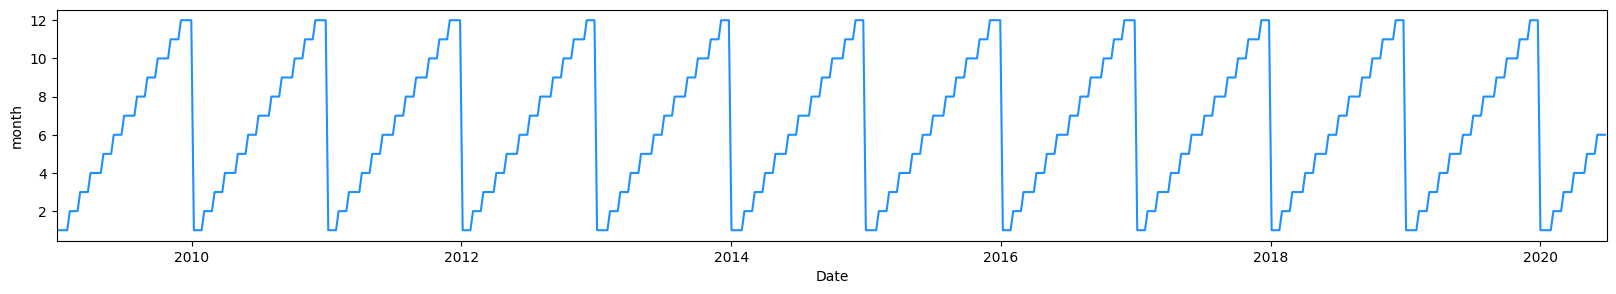

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df.Date, y=df.month, color='dodgerblue')
ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

In [ ]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df.month/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df.month/month_in_year)

The 'quarter' feature can then be used in the encoding process to handle the cyclical nature of time-related data and properly represent the seasonality in the data. The sine and cosine transformations applied to the 'quarter' feature will help avoid the issue of a discontinuity when the year changes and ensure that the patterns and relationships in the data are correctly captured.

Decomposition
The characteristics of a time series are

Trend and Level
Seasonality
Random / Noise
We can use the function seasonal_decompose() from the statsmodels library.

Additive:  𝑦(𝑡)=𝐿𝑒𝑣𝑒𝑙+𝑇𝑟𝑒𝑛𝑑+𝑆𝑒𝑎𝑠𝑜𝑛𝑎𝑙𝑖𝑡𝑦+𝑁𝑜𝑖𝑠𝑒 
Multiplicative:  𝑦(𝑡)=𝐿𝑒𝑣𝑒𝑙∗𝑇𝑟𝑒𝑛𝑑∗𝑆𝑒𝑎𝑠𝑜𝑛𝑎𝑙𝑖𝑡𝑦∗𝑁𝑜𝑖𝑠𝑒 

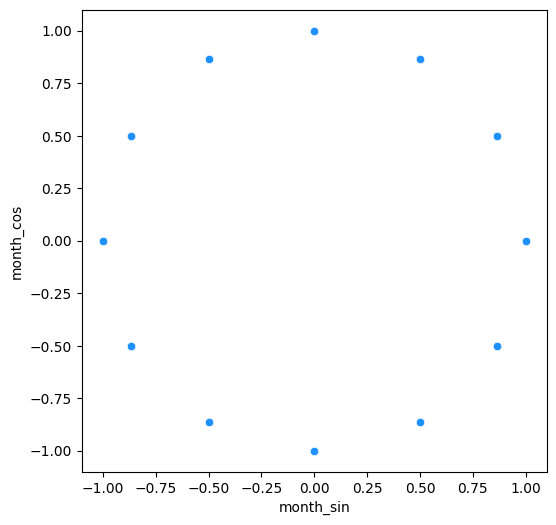

In [ ]:
days_in_month = 30
df['day_sin'] = np.sin(2*np.pi*df.day/days_in_month)
df['day_cos'] = np.cos(2*np.pi*df.day/days_in_month)

days_in_year = 365
df['day_of_year_sin'] = np.sin(2*np.pi*df.day_of_year/days_in_year)
df['day_of_year_cos'] = np.cos(2*np.pi*df.day_of_year/days_in_year)

weeks_in_year = 52.1429
df['week_of_year_sin'] = np.sin(2*np.pi*df.week_of_year/weeks_in_year)
df['week_of_year_cos'] = np.cos(2*np.pi*df.week_of_year/weeks_in_year)

quarters_in_year = 4
df['quarter_sin'] = np.sin(2*np.pi*df.quarter/quarters_in_year)
df['quarter_cos'] = np.cos(2*np.pi*df.quarter/quarters_in_year)

seasons_in_year = 4
df['season_sin'] = np.sin(2*np.pi*df.season/seasons_in_year)
df['season_cos'] = np.cos(2*np.pi*df.season/seasons_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_cols =  ['Rainfall', 'Temperature', 
                   'Drainage_Volume', 
                   'River_Hydrometry', 'Depth_to_Groundwater_P25']

for col in decompose_cols:
    decomp = seasonal_decompose(df[col], period=52, model='additive', extrapolate_trend='freq')
    df[f"{col}_trend"] = decomp.trend
    df[f"{col}_seasonal"] = decomp.seasonal

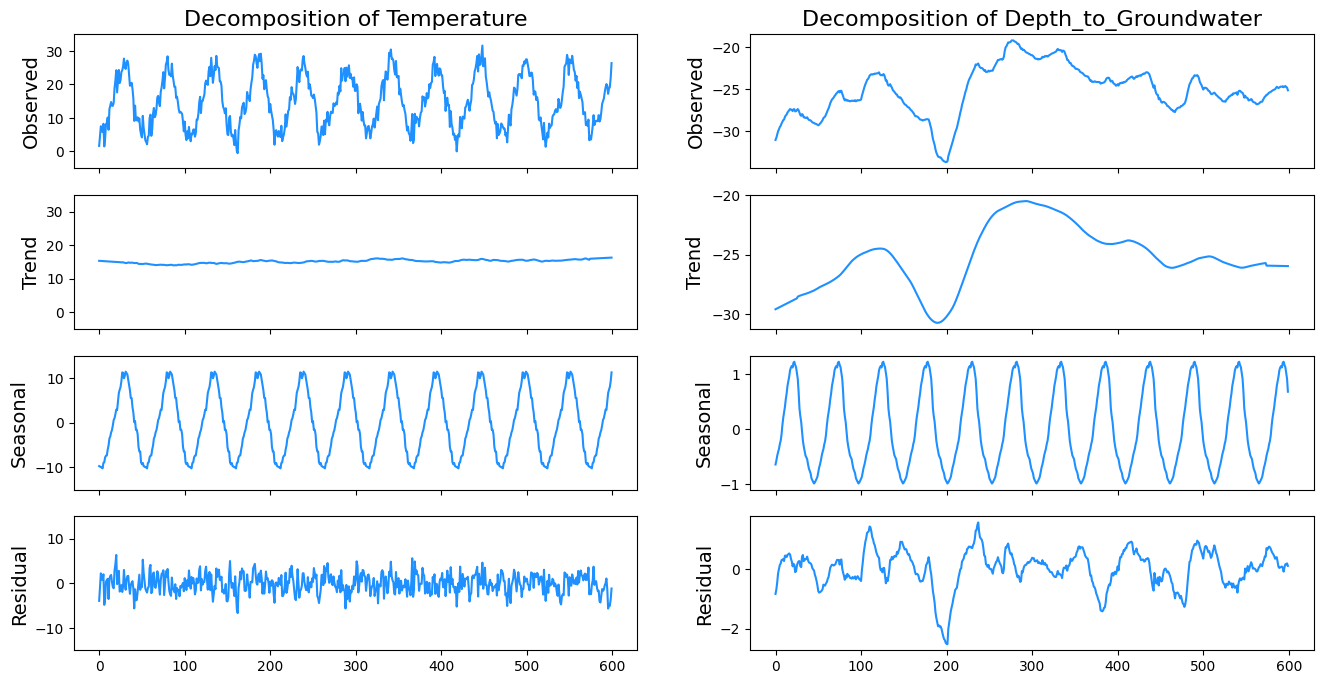

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))
res = seasonal_decompose(df.Temperature, period=52, model='additive', extrapolate_trend='freq')

ax[0,0].set_title('Decomposition of Temperature', fontsize=16)
res.observed.plot(ax=ax[0,0], legend=False, color='dodgerblue')
ax[0,0].set_ylabel('Observed', fontsize=14)
ax[0,0].set_ylim([-5, 35])

res.trend.plot(ax=ax[1,0], legend=False, color='dodgerblue')
ax[1,0].set_ylabel('Trend', fontsize=14)
ax[1,0].set_ylim([-5, 35])

res.seasonal.plot(ax=ax[2,0], legend=False, color='dodgerblue')
ax[2,0].set_ylabel('Seasonal', fontsize=14)
ax[2,0].set_ylim([-15, 15])

res.resid.plot(ax=ax[3,0], legend=False, color='dodgerblue')
ax[3,0].set_ylabel('Residual', fontsize=14)
ax[3,0].set_ylim([-15, 15])

ax[0,1].set_title('Decomposition of Depth_to_Groundwater', fontsize=16)
res = seasonal_decompose(df.Depth_to_Groundwater_P25, period=52, model='additive', extrapolate_trend='freq')

res.observed.plot(ax=ax[0, 1], legend=False, color='dodgerblue')
ax[0, 1].set_ylabel('Observed', fontsize=14)

res.trend.plot(ax=ax[1, 1], legend=False, color='dodgerblue')
ax[1, 1].set_ylabel('Trend', fontsize=14)

res.seasonal.plot(ax=ax[2, 1], legend=False, color='dodgerblue')
ax[2, 1].set_ylabel('Seasonal', fontsize=14)

res.resid.plot(ax=ax[3, 1], legend=False, color='dodgerblue')
ax[3, 1].set_ylabel('Residual', fontsize=14)

plt.show()

In [ ]:
df.columns

Index(['Date', 'Depth_to_Groundwater_P25', 'Temperature', 'Drainage_Volume',
       'River_Hydrometry', 'Rainfall', 'Depth_to_Groundwater_log',
       'Depth_to_Groundwater_diff_1', 'Depth_to_Groundwater_diff_2', 'year',
       'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season',
       'month_sin', 'month_cos', 'day_sin', 'day_cos', 'day_of_year_sin',
       'day_of_year_cos', 'week_of_year_sin', 'week_of_year_cos',
       'quarter_sin', 'quarter_cos', 'season_sin', 'season_cos',
       'Rainfall_trend', 'Rainfall_seasonal', 'Temperature_trend',
       'Temperature_seasonal', 'Drainage_Volume_trend',
       'Drainage_Volume_seasonal', 'River_Hydrometry_trend',
       'River_Hydrometry_seasonal', 'Depth_to_Groundwater_P25_trend',
       'Depth_to_Groundwater_P25_seasonal'],
      dtype='object')

In [ ]:
df[['Rainfall', 'Rainfall_trend', 'Rainfall_seasonal', 
          'Temperature', 'Temperature_trend', 'Temperature_seasonal', 
          'Drainage_Volume', 'Drainage_Volume_trend', 'Drainage_Volume_seasonal',
          'River_Hydrometry', 'River_Hydrometry_trend', 'River_Hydrometry_seasonal', 
          'Depth_to_Groundwater_P25', 'Depth_to_Groundwater_P25_trend', 'Depth_to_Groundwater_P25_seasonal']].head()\
.style.set_properties(subset=['Rainfall_trend', 'Rainfall_seasonal', 
                              'Temperature_trend', 'Temperature_seasonal', 
                              'Drainage_Volume_trend', 'Drainage_Volume_seasonal', 
                              'River_Hydrometry_trend', 'River_Hydrometry_seasonal',
                              'Depth_to_Groundwater_P25_trend', 'Depth_to_Groundwater_P25_seasonal'
                             ], **{'background-color': 'dodgerblue'})

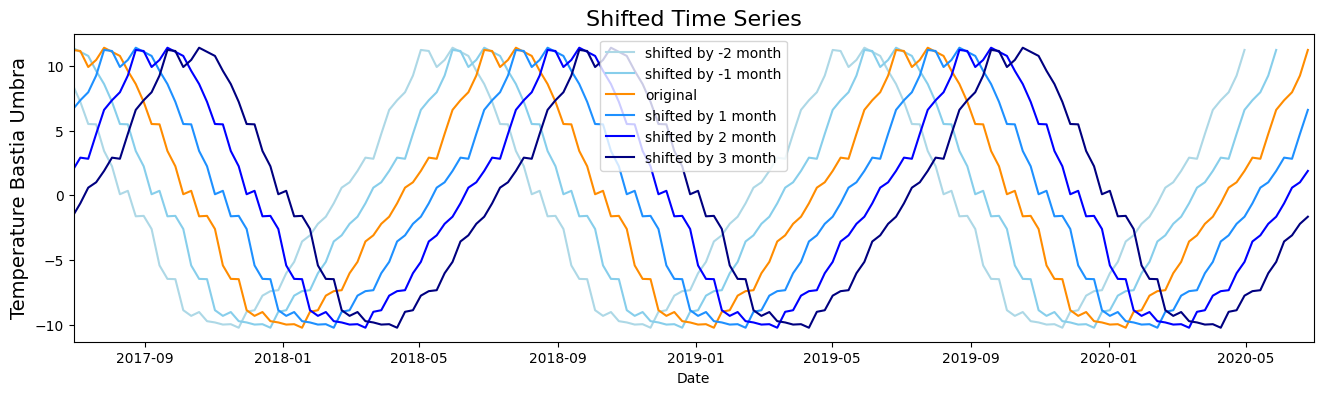

In [ ]:
weeks_in_month = 4

df['Temperature_seasonal_shift_r_2M'] = df.Temperature_seasonal.shift(-2*weeks_in_month)
df['Temperature_seasonal_shift_r_1M'] = df.Temperature_seasonal.shift(-1*weeks_in_month)
df['Temperature_seasonal_shift_1M'] = df.Temperature_seasonal.shift(1*weeks_in_month)
df['Temperature_seasonal_shift_2M'] = df.Temperature_seasonal.shift(2*weeks_in_month)
df['Temperature_seasonal_shift_3M'] = df.Temperature_seasonal.shift(3*weeks_in_month)

df['Drainage_Volume_seasonal_shift_r_2M'] = df.Drainage_Volume_seasonal.shift(-2*weeks_in_month)
df['Drainage_Volume_seasonal_shift_r_1M'] = df.Drainage_Volume_seasonal.shift(-1*weeks_in_month)
df['Drainage_Volume_seasonal_shift_1M'] = df.Drainage_Volume_seasonal.shift(1*weeks_in_month)
df['Drainage_Volume_seasonal_shift_2M'] = df.Drainage_Volume_seasonal.shift(2*weeks_in_month)
df['Drainage_Volume_seasonal_shift_3M'] = df.Drainage_Volume_seasonal.shift(3*weeks_in_month)

df['River_Hydrometry_seasonal_shift_r_2M'] = df.River_Hydrometry_seasonal.shift(-2*weeks_in_month)
df['River_Hydrometry_seasonal_shift_r_1M'] = df.River_Hydrometry_seasonal.shift(-1*weeks_in_month)
df['River_Hydrometry_seasonal_shift_1M'] = df.River_Hydrometry_seasonal.shift(1*weeks_in_month)
df['River_Hydrometry_seasonal_shift_2M'] = df.River_Hydrometry_seasonal.shift(2*weeks_in_month)
df['River_Hydrometry_seasonal_shift_3M'] = df.River_Hydrometry_seasonal.shift(3*weeks_in_month)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,4))
sns.lineplot(x=df.Date, y=df.Temperature_seasonal_shift_r_2M, label='shifted by -2 month', ax=ax, color='lightblue')
sns.lineplot(x=df.Date, y=df.Temperature_seasonal_shift_r_1M, label='shifted by -1 month', ax=ax, color='skyblue')

sns.lineplot(x=df.Date, y=df.Temperature_seasonal, label='original', ax=ax, color='darkorange')

sns.lineplot(x=df.Date, y=df.Temperature_seasonal_shift_1M, label='shifted by 1 month', ax=ax, color='dodgerblue')
sns.lineplot(x=df.Date, y=df.Temperature_seasonal_shift_2M, label='shifted by 2 month', ax=ax, color='blue')
sns.lineplot(x=df.Date, y=df.Temperature_seasonal_shift_3M, label='shifted by 3 month', ax=ax, color='navy')

ax.set_title('Shifted Time Series', fontsize=16)

ax.set_xlim([date(2017, 6, 30), date(2020, 6, 30)])
ax.set_ylabel(ylabel='Temperature Bastia Umbra', fontsize=14)

plt.show()

# Exploratory Data Analysis
Let's begin by plotting the seasonal components of each feature and comparing the minima and maxima. By doing this, we can already gain some insights:

The depth to groundwater reaches its maximum around May/June and its minimum around November/December
The temperature reaches its maxmium around August and its minimum around January
The volume reaches its maximum around June and its minimum around August/September. It takes longer to reach its maximum than to reach its minimum.
The hydrometry reaches its maximum around March and its minimum around September

The volume and hydrometry reach their minimum roughly around the same time

The volume and hydrometry reach their minimum when the temperature reaches its maximum
Temperature lags begind depth to groundwater by around 2 to 3 months

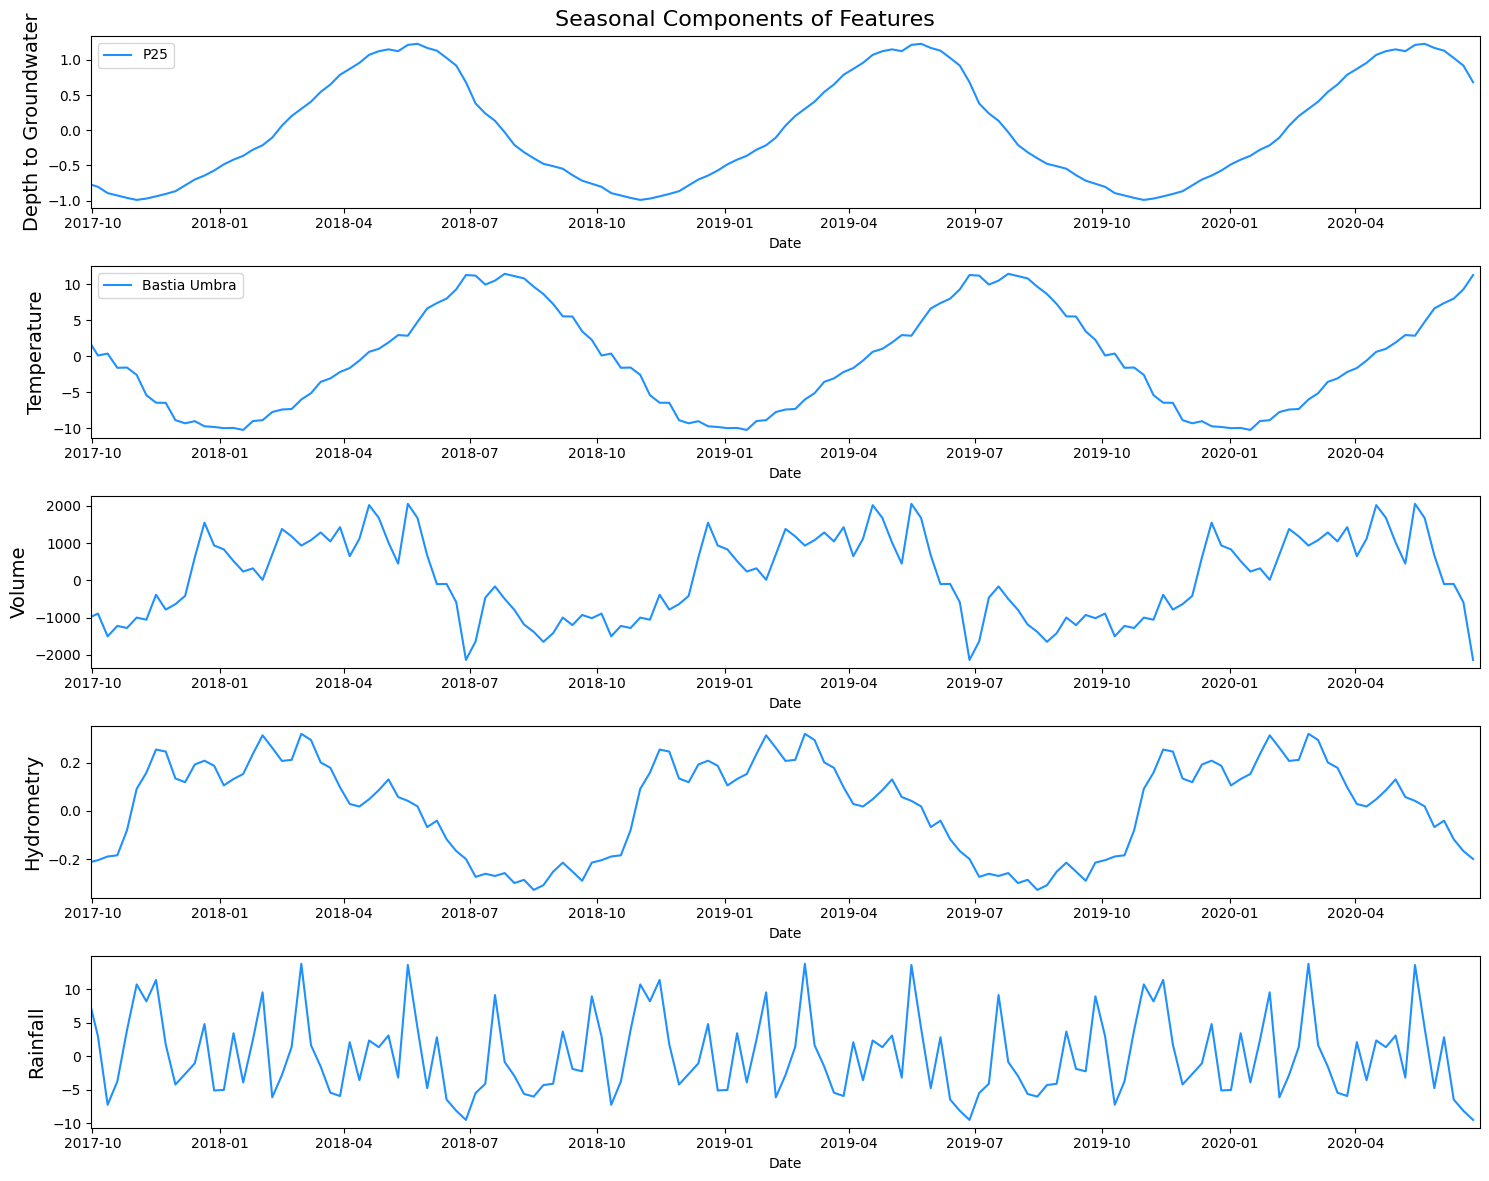

In [ ]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P25_seasonal, ax=ax[0], color='dodgerblue', label='P25')
ax[0].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

sns.lineplot(x=df.Date, y=df.Temperature_seasonal, ax=ax[1], color='dodgerblue', label='Bastia Umbra')
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)

sns.lineplot(x=df.Date, y=df.Drainage_Volume_seasonal, ax=ax[2], color='dodgerblue')
ax[2].set_ylabel(ylabel='Volume', fontsize=14)

sns.lineplot(x=df.Date, y=df.River_Hydrometry_seasonal, ax=ax[3], color='dodgerblue')
ax[3].set_ylabel(ylabel='Hydrometry', fontsize=14)

sns.lineplot(x=df.Date, y=df.Rainfall_seasonal, ax=ax[4], color='dodgerblue')
ax[4].set_ylabel(ylabel='Rainfall', fontsize=14)

for i in range(5):
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
plt.tight_layout()
plt.show()

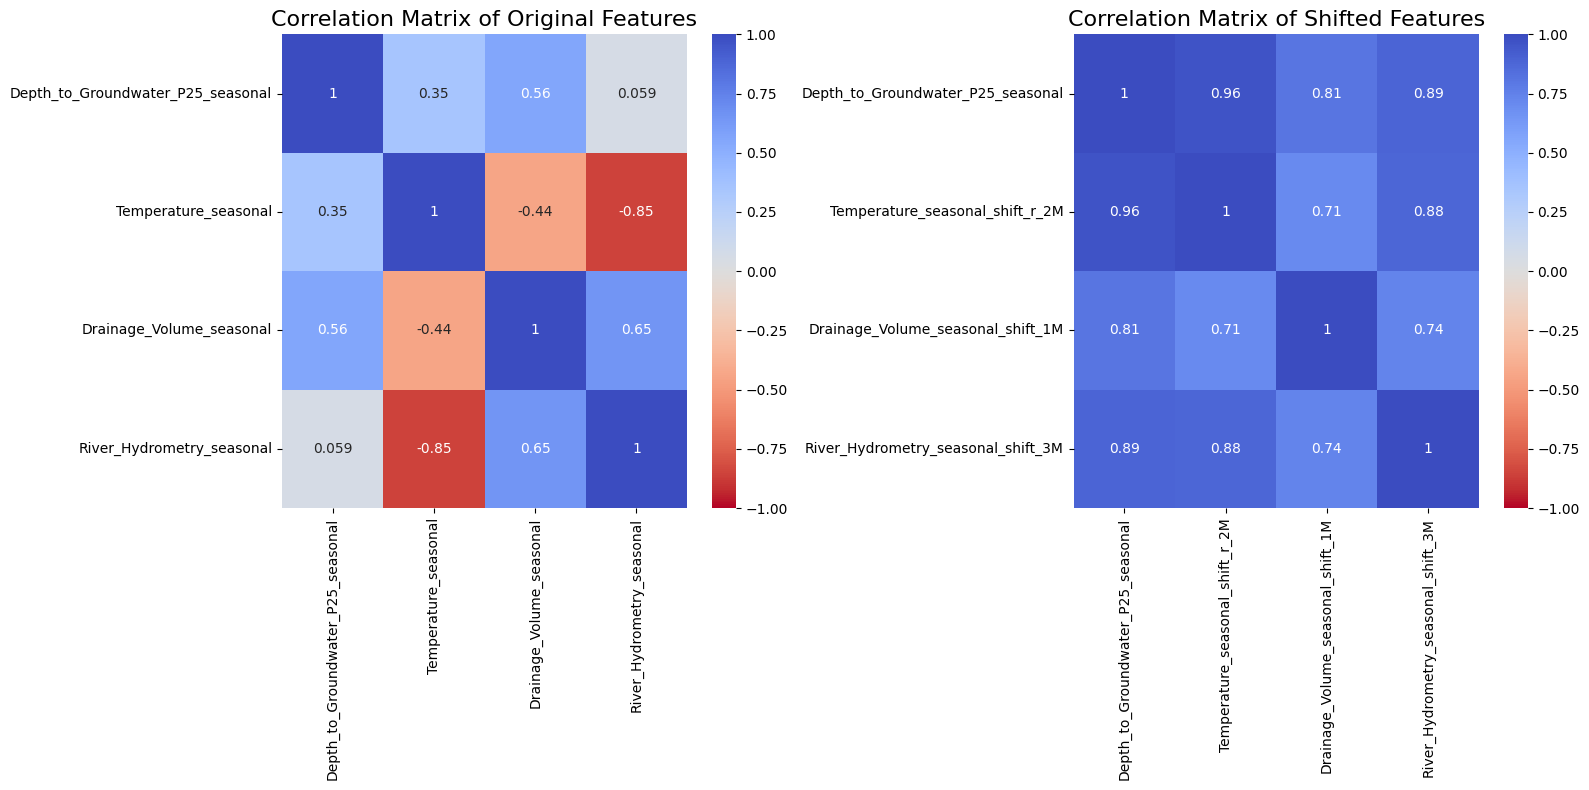

In [ ]:
#We can see that the correlation to the target variables increases if we use the time shifted features in comparison to the original features.

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

original_cols = ['Depth_to_Groundwater_P25_seasonal', 
                 'Temperature_seasonal',
                 'Drainage_Volume_seasonal', 'River_Hydrometry_seasonal']

corrmat = df[original_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Original Features', fontsize=16)

shifted_cols = [ 'Depth_to_Groundwater_P25_seasonal', 
                'Temperature_seasonal_shift_r_2M',
                'Drainage_Volume_seasonal_shift_1M', 'River_Hydrometry_seasonal_shift_3M']
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Shifted Features', fontsize=16)


plt.tight_layout()
plt.show()

# Autocorrelation Analysis
For further details on this topic, see my other notebook: Time Series: Interpreting ACF and PACF
This EDA step is especially important when using ARIMA. The autocorrelation analysis helps to identify the AR and MA parameters for the ARIMA model.

- Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

- Autocorrelation Function (ACF): Correlation between time series with a lagged version of itself. The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1. -> MA parameter is q significant lags
- Partial Autocorrelation Function (PACF): Additional correlation explained by each successive lagged term -> AR parameter is p significant lags
Autocorrelation helps in detecting seasonality.

As we can infer from the graph above, the autocorrelation continues to decrease as the lag increases, confirming that there is no linear association between observations separated by larger lags.

For the AR process, we expect that the ACF plot will gradually decrease and simultaneously the PACF should have a sharp drop after p significant lags. To define a MA process, we expect the opposite from the ACF and PACF plots, meaning that: the ACF should show a sharp drop after a certain q number of lags while PACF should show a geometric or gradual decreasing trend.

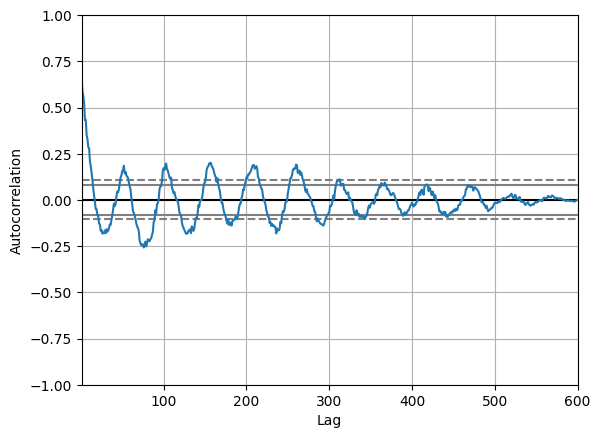

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Depth_to_Groundwater_diff_1)
plt.show()

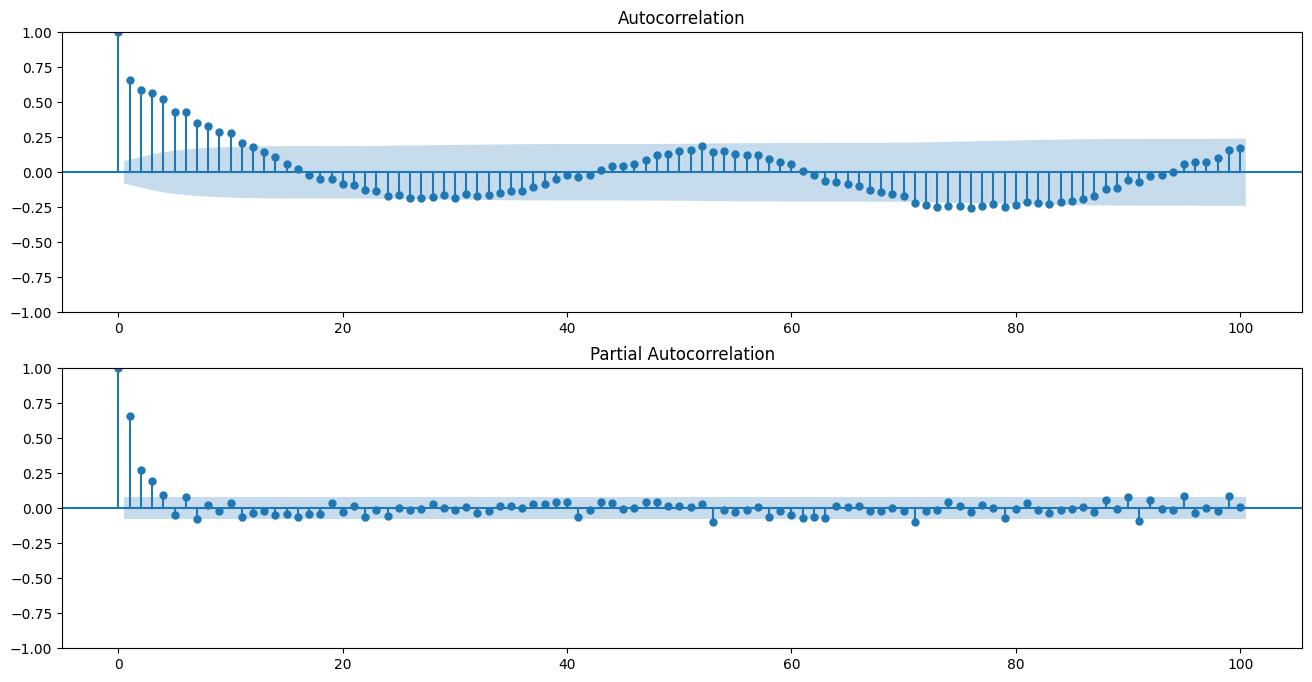

In [ ]:
#We can see some sinusoidal shape in both ACF and PACF functions. This suggests that both AR and MA processes are present.


from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df.Depth_to_Groundwater_diff_1,lags=100, ax=ax[0])
plot_pacf(df.Depth_to_Groundwater_diff_1,lags=100, ax=ax[1])
plt.show()

"""
## Spectral Analysis
to analyse cyclic behavior
Frequency domain analysis

## Trend estimation and decomposition
used for seasonal adjustment
"""

In summary, spectral analysis allows us to examine cyclic behavior and identify periodic patterns in the frequency domain, while trend estimation and decomposition help in extracting the underlying trend and seasonality from the time series, making it easier to analyze and model the data effectively. Both techniques play significant roles in time series analysis and provide valuable insights for understanding and interpreting the data.

# Cross Validation




In [ ]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df.Date
y = df.Depth_to_Groundwater_P25

folds = TimeSeriesSplit(n_splits=N_SPLITS)

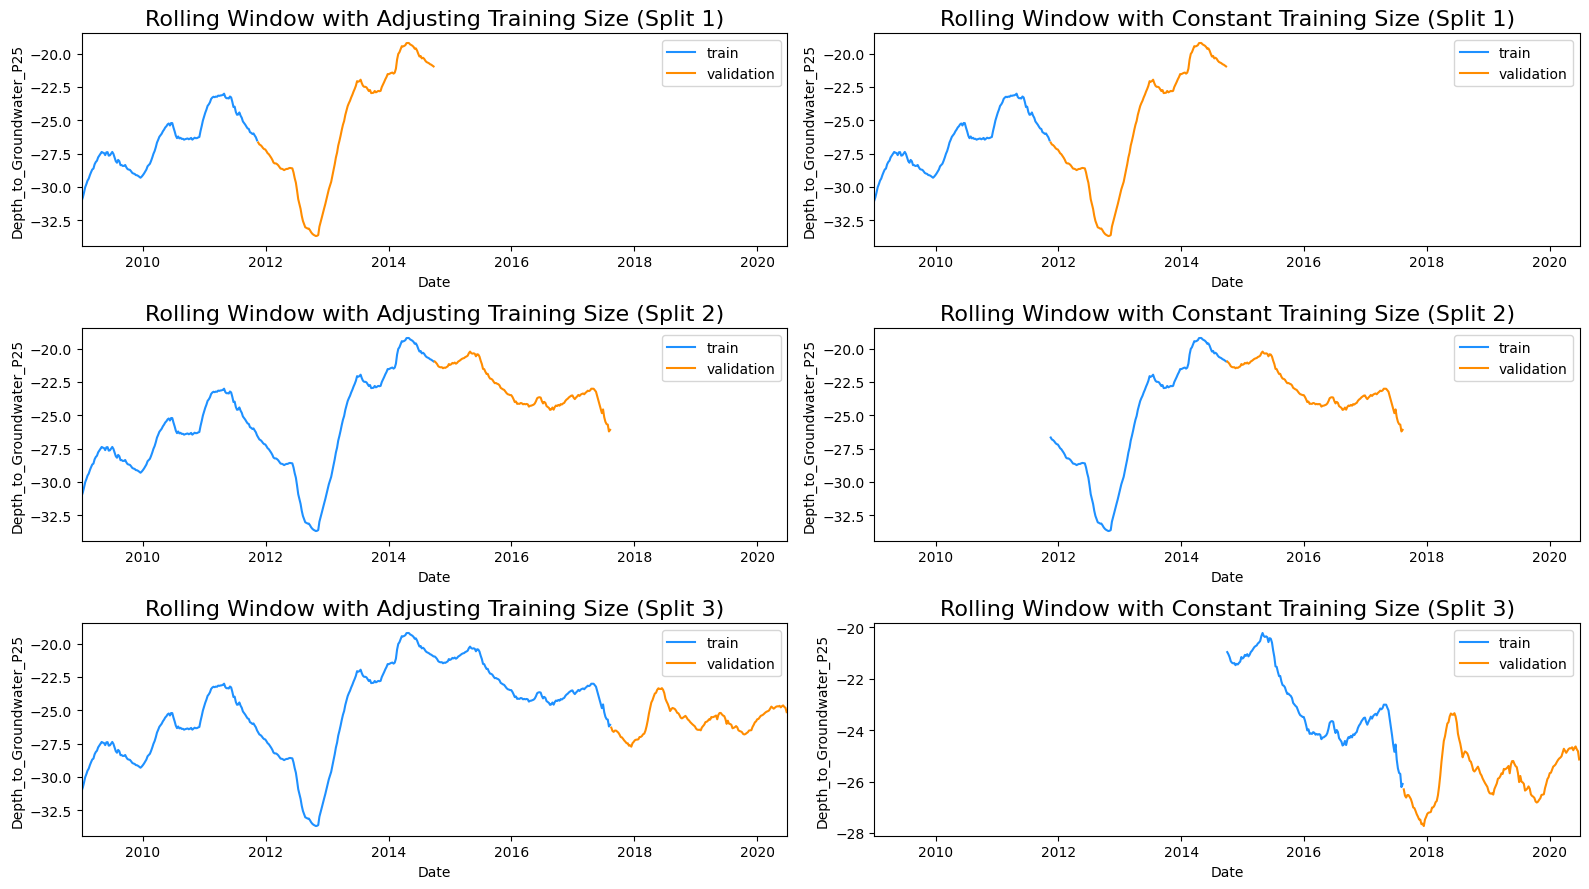

In [ ]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(x= X_train, y= y_train, ax=ax[i,0], color='dodgerblue', label='train')
    sns.lineplot(x= X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 y= y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 ax=ax[i,1], color='dodgerblue', label='train')

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.tight_layout()
plt.show()

Models
Time series can be either univariate or multivariate:

Univariate time series only has a single time-dependent variable.
Multivariate time series have a multiple time-dependent variable.
Our example originally is a multivariate time series because its has multiple features that are all time-dependent. However, by only looking at the target variable Depth to Groundwater we can convert it to a univariate time series.

We will focus on a quarterly forecast. We will use the Q2 2020 as test data and the remaining data will be split by quarter for cross validation.

We will evaluate the Mean Absolute Error (MAE) and the Root Mean Square Error (RMSE) of the models. For metrics are better the smaller they are.

Models for Univariate Time Series
Stochastic Models
Naive Approach
Moving Average
Exponential Smoothing
ARIMA
Prophet
Deep Learning
LSTM
GRU

In [ ]:
df.columns

Index(['Date', 'Depth_to_Groundwater_P25', 'Temperature', 'Drainage_Volume',
       'River_Hydrometry', 'Rainfall', 'Depth_to_Groundwater_log',
       'Depth_to_Groundwater_diff_1', 'Depth_to_Groundwater_diff_2', 'year',
       'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season',
       'month_sin', 'month_cos', 'day_sin', 'day_cos', 'day_of_year_sin',
       'day_of_year_cos', 'week_of_year_sin', 'week_of_year_cos',
       'quarter_sin', 'quarter_cos', 'season_sin', 'season_cos',
       'Rainfall_trend', 'Rainfall_seasonal', 'Temperature_trend',
       'Temperature_seasonal', 'Drainage_Volume_trend',
       'Drainage_Volume_seasonal', 'River_Hydrometry_trend',
       'River_Hydrometry_seasonal', 'Depth_to_Groundwater_P25_trend',
       'Depth_to_Groundwater_P25_seasonal', 'Temperature_seasonal_shift_r_2M',
       'Temperature_seasonal_shift_r_1M', 'Temperature_seasonal_shift_1M',
       'Temperature_seasonal_shift_2M', 'Temperature_seasonal_shift_3M',
       'Drainage_V

By using this approach, we create a numerical index (quarter_idx) that groups consecutive quarters with the same value together, enabling us to differentiate between different quarters in the time series. This can be helpful for various time series analysis tasks, such as seasonality detection, aggregation, or any analysis that requires labeling each quarter with a unique identifier.

In [ ]:
df['quarter_idx'] = (df.quarter != df.quarter.shift(1)).cumsum()

target = 'Depth_to_Groundwater_P25'
features = [feature for feature in df.columns if feature != target]

N_SPLITS = 46

X = df[df.quarter_idx < N_SPLITS][features]
y = df[df.quarter_idx < N_SPLITS][target]

X_test = df[df.quarter_idx == N_SPLITS][features].reset_index(drop=True)
y_test = df[df.quarter_idx == N_SPLITS][target].reset_index(drop=True)

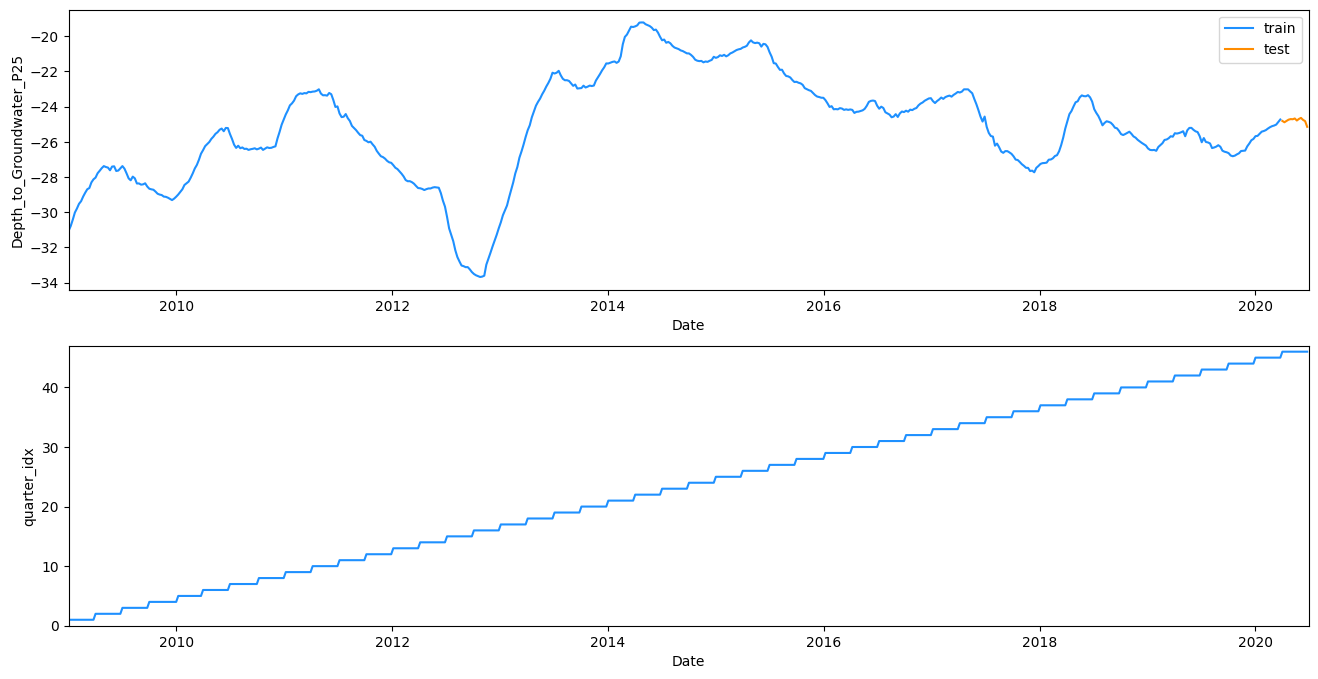

In [ ]:
folds = np.linspace(0, N_SPLITS-3, num=N_SPLITS-2)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

sns.lineplot(x=X.Date, y=y, ax=ax[0], color='dodgerblue', label='train')
sns.lineplot(x=X_test.Date, y=y_test, ax=ax[0], color='darkorange', label='test')

sns.lineplot(x=df.Date, y=df.quarter_idx, ax=ax[1], color='dodgerblue')
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
ax[1].set_ylim([0, N_SPLITS+1])
#ax[0].set_ylim([-28, -23])

plt.show()

In [ ]:
def plot_approach_evaluation(y_pred, score_mae, score_rsme, approach_name):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    f.suptitle(approach_name, fontsize=16)
    sns.lineplot(x=X.Date, y=y, ax=ax[0], color='dodgerblue', label='Training', linewidth=2)
    sns.lineplot(x=X_test.Date, y=y_test, ax=ax[0], color='gold', label='Ground Truth', linewidth=2) #navajowhite
    sns.lineplot(x=X_test.Date, y=y_pred, ax=ax[0], color='darkorange', label='Predicted', linewidth=2)
    ax[0].set_xlim([date(2018, 6, 30), date(2020, 6, 30)])
    ax[0].set_ylim([-27, -23])
    ax[0].set_title(f'Prediction \n MAE: {mean_absolute_error(y_test, y_pred):.2f}, RSME: {math.sqrt(mean_squared_error(y_valid, y_valid_pred)):.2f}', fontsize=14)
    ax[0].set_xlabel(xlabel='Date', fontsize=14)
    ax[0].set_ylabel(ylabel='Depth to Groundwater P25', fontsize=14)

    sns.lineplot(x=folds, y=score_mae,  color='gold', label='MAE', ax=ax[1])#marker='o',
    sns.lineplot(x=folds, y=score_rsme, color='indianred', label='RSME', ax=ax[1])
    ax[1].set_title('Loss', fontsize=14)
    ax[1].set_xlabel(xlabel='Fold', fontsize=14)
    ax[1].set_ylabel(ylabel='Loss', fontsize=14)
    ax[1].set_ylim([0, 4])   
    plt.show()

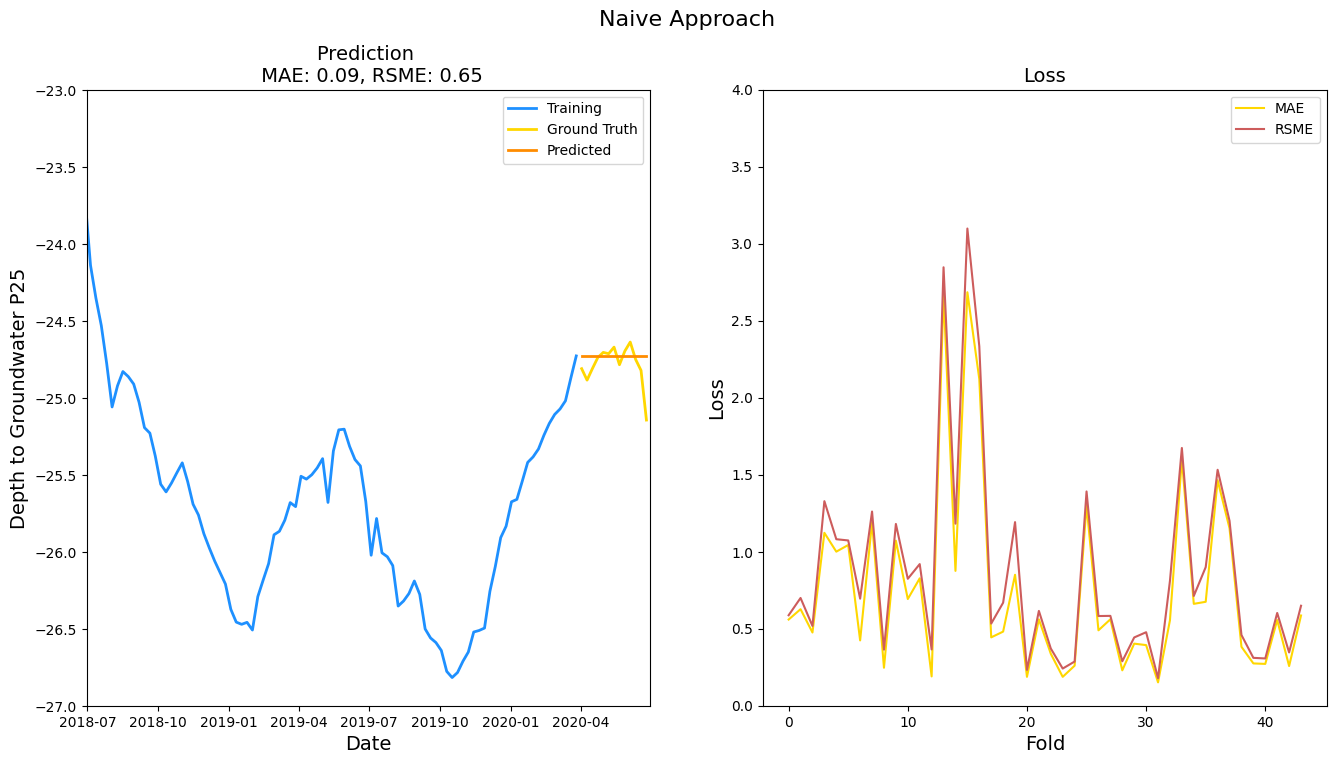

In [ ]:
score_mae = []
score_rsme = []
for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))
    
    # Prediction: Naive approach
    y_valid_pred = y_valid_pred * y_train.iloc[-1]
    
    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.ones(len(X_test))) * y.iloc[-1]

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Naive Approach')

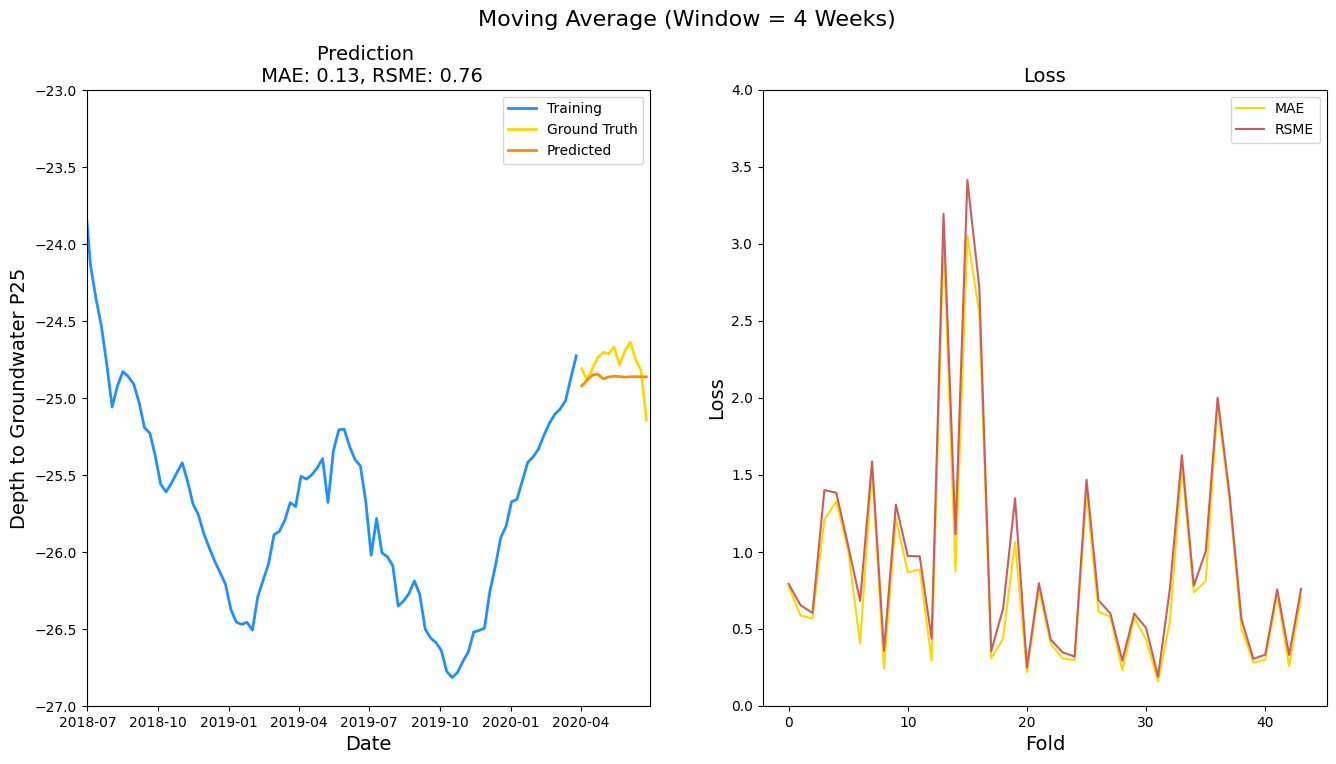

In [ ]:
score_mae = []
score_rsme = []
for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))
    
    # Prediction: Naive approach    
    for i in range(len(y_valid_pred)):
        y_valid_pred.iloc[i] = y_train.append(y_valid_pred.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]
        
    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.zeros(len(X_test)))

for i in range(len(y_pred)):
    y_pred.iloc[i] = y.append(y_pred.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Moving Average (Window = 4 Weeks)')

# Neither the Naive Approach nor the Moving Average Approach are yielding good results for our example. Usually, these approaches serve as a benchmark rather than the method of choice.

ARIMA

The Auto-Regressive Integrated Moving Average (ARIMA) model describes the autocorrelations in the data. The model assumes that the time-series is stationary. It consists of three main parts:

Auto-Regressive (AR) filter (long term):

𝑦𝑡=𝑐+𝛼1𝑦𝑡−1+…𝛼𝑝𝑦𝑡−𝑝+𝜖𝑡=𝑐+∑𝑝𝑖=1𝛼𝑖𝑦𝑡−𝑖+𝜖𝑡  -> p

Integration filter (stochastic trend)

-> d

Moving Average (MA) filter (short term):

𝑦𝑡=𝑐+𝜖𝑡+𝛽1𝜖𝑡−1+⋯+𝛽𝑞𝜖𝑡−𝑞=𝑐+𝜖𝑡+∑𝑞𝑖=1𝛽𝑖𝜖𝑡−𝑖  -> q

ARIMA: $y_t = c + \color{purple}{\alpha1 y{t-1} + \dots + \alpha{\color{purple}p}y{t-\color{purple}p}}

\color{blue}{\epsilon_t + \beta1 \epsilon{t-1} + \dots + \beta{q} \epsilon{t-q}}$
ARIMA( p, d, q)

p: Lag order (to determine see PACF in Autocorrelation Analysis)
d: Degree of differencing. (to determine see Differencing in Stationarity)
q: Order of moving average (to determine see ACF in Autocorrelation Analysis)

**In our example, we can use d=0 if we use the feature Depth_to_Groundwater_diff_1, which is Depth_to_Groundwater differenced by the first degree. Otherwise, if we were to use the non-stationary feature Depth_to_Groundwater as it is, we should set d=1.**

/root/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


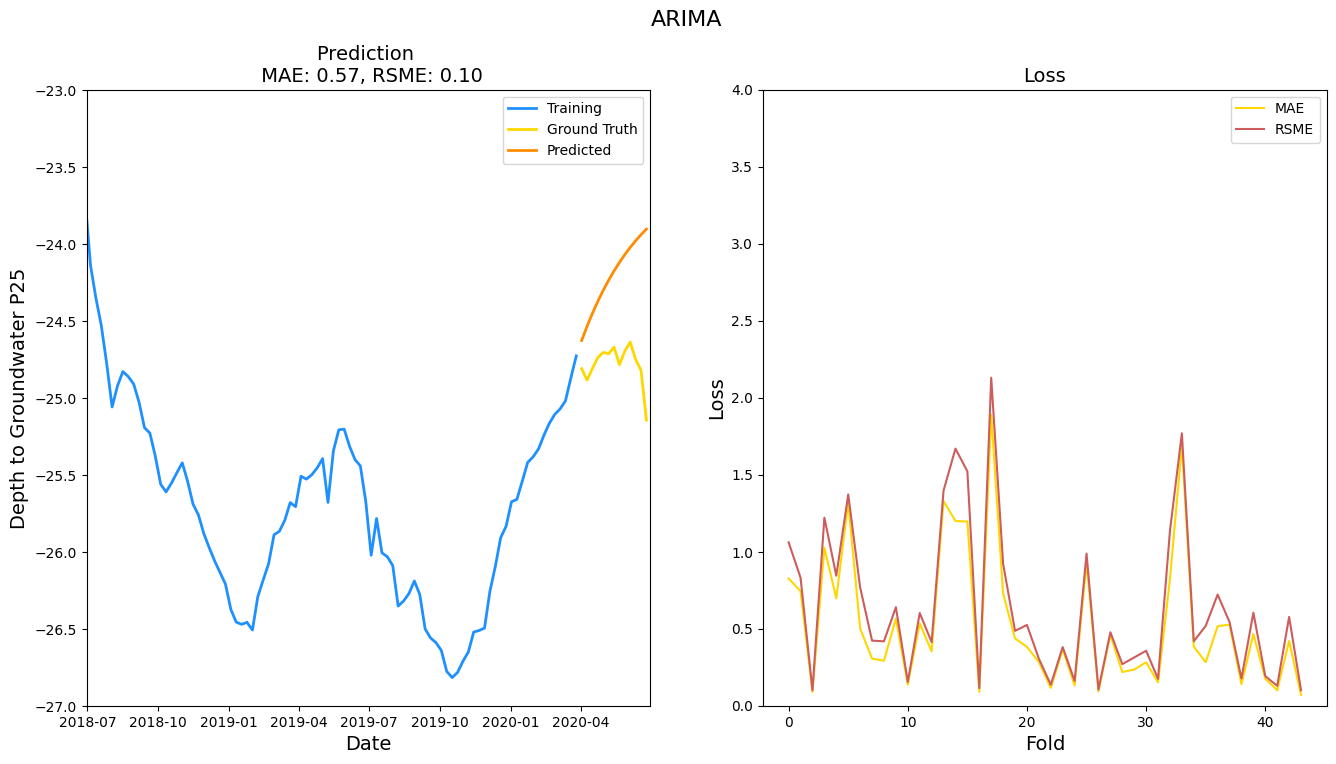

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

score_mae = []
score_rsme = []

for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Fit model with Vector Auto Regression (VAR)
    model = ARIMA(y_train, order=(1,1,1))
    model_fit = model.fit()
    
    # Prediction with Vector Auto Regression (VAR)
    y_valid_pred = model_fit.predict(valid_index[0], valid_index[-1])

    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))


# Fit model with Vector Auto Regression (VAR)
model = ARIMA(y, order=(1,1,1))
model_fit = model.fit()

# Prediction with Vector Auto Regression (VAR)
y_pred = model_fit.predict(y.index[-1]+1, y.index[-1] + len(y_test)).reset_index(drop=True)
plot_approach_evaluation(y_pred, score_mae, score_rsme, 'ARIMA')

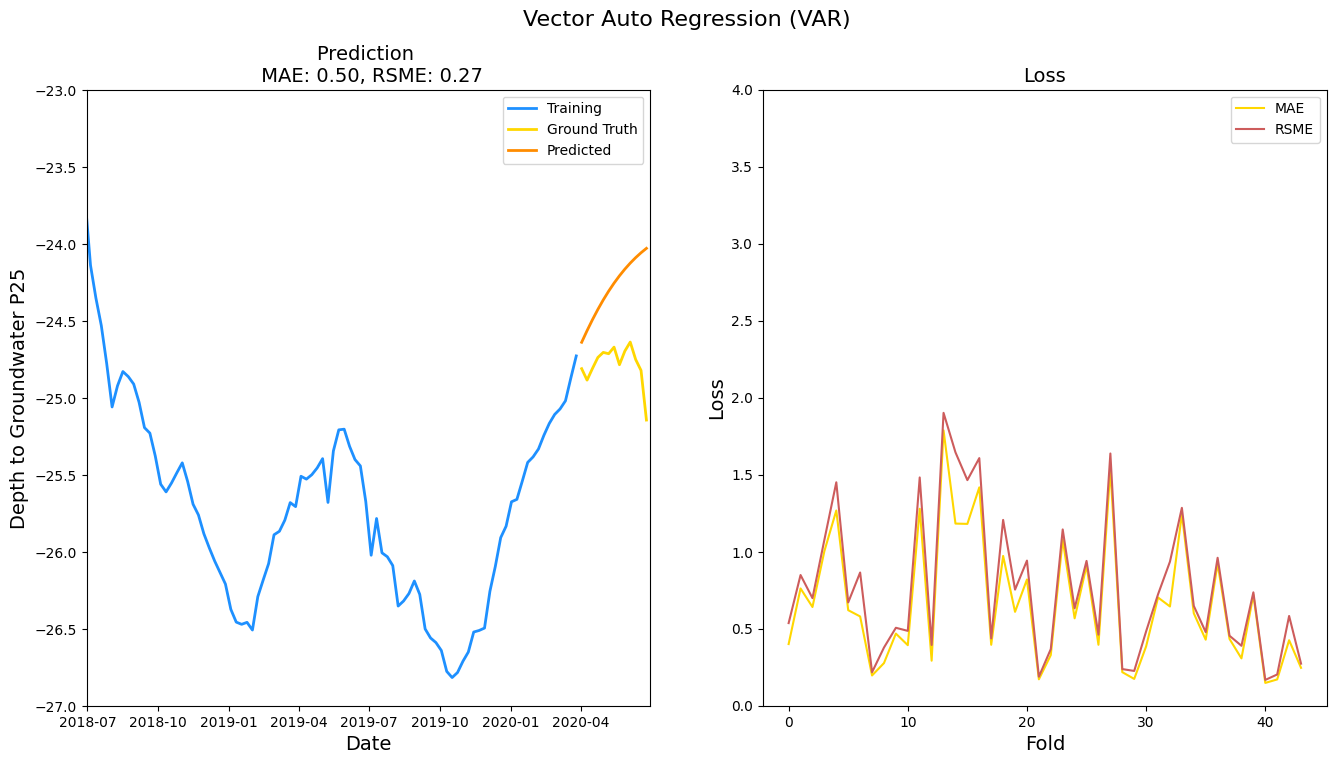

In [ ]:
from statsmodels.tsa.api import VAR

score_mae = []
score_rsme = []

features = ['Temperature', 'Drainage_Volume', 'River_Hydrometry','Rainfall' ]
for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    X_train, X_valid = X.iloc[train_index][features], X.iloc[valid_index][features]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Fit model with Vector Auto Regression (VAR)
    model = VAR(pd.concat([y_train, X_train], axis=1))
    model_fit = model.fit()
    
    # Prediction with Vector Auto Regression (VAR)
    y_valid_pred = model_fit.forecast(model.endog, steps=len(X_valid))
    y_valid_pred = pd.Series(y_valid_pred[:, 0])

    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

# Fit model with Vector Auto Regression (VAR)
model = VAR(pd.concat([y, X[features]], axis=1))
model_fit = model.fit()

# Prediction with Vector Auto Regression (VAR)
y_pred = model_fit.forecast(model_fit.endog, steps=len(X_valid))
y_pred = pd.Series(y_pred[:, 0])

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Vector Auto Regression (VAR)')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e26f9bb6-876a-4c70-9821-f89ffc83ff58' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>